<a href="https://colab.research.google.com/github/morenourey/CHAT/blob/main/ML_1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 1 - PREPROCESSING

# Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# fechas
from datetime import datetime

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# algoritmos de clasificación
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# algoritmos de regresión
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# métricas
import sklearn.metrics as metrics

# hiperparametrización
from sklearn.model_selection import GridSearchCV

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

import xgboost as xgb

from numpy import random
random.seed(42)

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


# Importar train data

In [4]:
# from google.colab import drive
#drive.mount('/content/drive')

In [5]:
df = pd.read_csv('telecom_churn_TRAINTEST.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float

In [7]:
df.sample(10)

rev      mou  totmrc      da  ovrmou   ovrrev   vceovr  datovr  \
89610   89.4850   268.00   94.99  0.4950    0.00   0.0000   0.0000     0.0   
12456   59.1900   376.50   30.00  0.2475   78.50  27.4750  27.4750     0.0   
53403   52.9600   396.00   49.99  0.4950    6.75   2.0250   2.0250     0.0   
62905   10.0900    77.25   10.00  0.0000    0.00   0.0000   0.0000     0.0   
66339  102.6250   856.25   39.99  1.9800  196.75  68.8625  68.8625     0.0   
1966    30.2475   165.50   30.00  0.2475    0.00   0.0000   0.0000     0.0   
88332   72.9850   753.00   42.90  7.4250   87.50  35.0000  35.0000     0.0   
8341    36.4550   193.25   32.49  1.2375    9.75   2.4375   2.4375     0.0   
80680   38.3000  1007.25   52.49  0.4950    0.00   0.0000   0.0000     0.0   
6606   100.9800   177.50  109.99  0.9900    0.00   0.0000   0.0000     0.0   

         roam  change_mou  change_rev   drop_vce  drop_dat   blck_vce  \
89610  0.0000       53.00      0.4950   0.333333       0.0   0.333333   
12456  1.4675      317.50     77.2100   2.333333       0.0  12.000000   
53403  0.0000      -54.00     -2.9700   4.333333       0.0   6.000000   
62905  0.0000      -50.25     -0.0900   0.666667       0.0   0.000000   
66339  2.4375     -229.25    -41.5450   4.666667       0.0   1.333333   
1966   0.0000       24.50      0.7425   2.000000       0.0   0.666667   
88332  0.1600     -710.00   -111.3550  14.333333       0.0   3.333333   
8341   0.0000     -140.25     -3.9650   1.666667       0.0   4.000000   
80680  0.0000      336.75     -3.3100   0.333333       0.0  33.000000   
6606   0.0000     -177.50     -0.9900   1.000000       0.0   0.666667   

       blck_dat    unan_vce  unan_dat    plcd_vce  plcd_dat   recv_vce  \
89610       0.0   12.333333  0.000000   59.000000  0.000000  59.333333   
12456       0.0   13.333333  0.000000  118.000000  0.000000  46.666667   
53403       0.0   32.333333  0.000000  147.666667  0.000000  53.333333   
62905       0.0    6.333333  0.000000   32.333333  0.000000   4.000000   
66339       0.0   39.333333  0.333333  223.000000  0.333333  44.333333   
1966        0.0    5.666667  0.000000   71.000000  0.000000   1.333333   
88332       0.0  158.000000  0.000000  516.333333  0.000000  90.333333   
8341        0.0   10.333333  0.000000   78.666667  0.000000  23.666667   
80680       0.0   14.333333  0.000000  152.000000  0.000000  12.000000   
6606        0.0    7.000000  0.000000   65.000000  0.000000  12.666667   

       recv_sms    comp_vce  comp_dat   custcare    ccrndmou     cc_mou  \
89610       0.0   46.333333       0.0   0.000000    0.000000   0.000000   
12456       0.0   91.000000       0.0   1.000000   10.000000   9.616667   
53403       0.0  107.666667       0.0   0.333333    0.333333   0.216667   
62905       0.0   25.333333       0.0   0.000000    0.000000   0.000000   
66339       0.0  180.000000       0.0   1.000000    3.666667   3.150000   
1966        0.0   62.666667       0.0   0.000000    0.000000   0.000000   
88332       0.0  341.666667       0.0  27.666667  108.000000  92.910000   
8341        0.0   62.666667       0.0   0.000000    0.000000   0.000000   
80680       0.0  104.333333       0.0   9.333333   11.000000   6.736667   
6606        0.0   56.333333       0.0   0.000000    0.000000   0.000000   

        inonemin  threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  \
89610  27.333333  0.000000   47.023333       0.0  130.803333    0.666667   
12456  26.000000  0.333333  145.586667       0.0   91.370000    6.666667   
53403  23.666667  0.000000  113.620000       0.0   97.863333   33.333333   
62905   1.666667  0.000000   51.810000       0.0    9.626667    1.666667   
66339  17.333333  0.000000  149.840000       0.0  134.566667  107.333333   
1966    0.666667  0.000000   67.790000       0.0    1.346667    9.000000   
88332  63.333333  0.666667  641.306667       0.0  113.226667   50.666667   
8341   11.666667  0.000000  110.700000       0.0   34.916667    7.000000   
80680   7.000000  1.6666

# Data Cleaning
* Eliminar filas sin target informado.
* Eliminar filas duplicadas (si tenemos ID, solo puede haber 1 registro por ID)
* Eliminar filas/columnas vacías y columnas irrelevantes
* Corregir data types incorrectos
* Categoricos: Corregir literales incorrectos (acentos, erratas, etc)
* Fechas y textos: convertir a variables numericas (hour, day, month, year...) o categoricas (weekday_name...)

In [8]:
# Detectar observaciones sin target informado
df['churn'].isna().sum()

0

In [9]:
# Detectar filas duplicadas
print('Filas duplicadas:', df.duplicated().sum()) 
print('Filas filas con identificador duplicadas:', df['Customer_ID'].duplicated().sum()) 

Filas duplicadas: 0
Filas filas con identificador duplicadas: 0


In [10]:
# Eliminar Columnas identificadoras
df = df.drop(columns=['Customer_ID'])

In [11]:
# Eliminar filas que tienen todos sus valores vacíos:
df = df.dropna(how='all')

# Eliminar columnas que tienen todos sus valores vacíos:
df = df.dropna(axis=1, how='all')

In [12]:
# Información del DataFrame luego de la limpieza
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               89866 non-null  float64
 1   mou               89866 non-null  float64
 2   totmrc            89866 non-null  float64
 3   da                89866 non-null  float64
 4   ovrmou            89866 non-null  float64
 5   ovrrev            89866 non-null  float64
 6   vceovr            89866 non-null  float64
 7   datovr            89866 non-null  float64
 8   roam              89866 non-null  float64
 9   change_mou        89405 non-null  float64
 10  change_rev        89405 non-null  float64
 11  drop_vce          90000 non-null  float64
 12  drop_dat          90000 non-null  float64
 13  blck_vce          90000 non-null  float64
 14  blck_dat          90000 non-null  float64
 15  unan_vce          90000 non-null  float64
 16  unan_dat          90000 non-null  float6

In [13]:
df.sample(10)

rev      mou   totmrc      da  ovrmou   ovrrev   vceovr  datovr  \
72548  205.0175   900.00  99.6675  4.7025    0.00   0.0000   0.0000     0.0   
51927   53.2550   211.00  29.9900  0.4950   56.25  22.5000  22.5000     0.0   
40373   56.4200   351.50  50.0000  0.0000   18.00   5.4000   5.4000     0.0   
53604   60.6025  1263.25  44.9900  1.9800   61.25  21.4375  21.4375     0.0   
42959   50.4500  1213.25  46.3250  0.0000   33.75  11.8375  11.8375     0.0   
39613   58.1000   189.50  29.9900  0.0000    0.00   0.0000   0.0000     0.0   
18755   46.7900   315.25  39.9900  0.0000   48.00  16.8000  16.8000     0.0   
42434   11.6875    38.50  10.0000  0.0000    6.75   1.6875   1.6875     0.0   
49056  132.0875  1731.00  59.9900  0.0000  205.00  82.0000  82.0000     0.0   
88369   41.0550   821.75  48.7800  0.7425   24.00   9.6000   9.6000     0.0   

           roam  change_mou  change_rev   drop_vce  drop_dat   blck_vce  \
72548  102.6475     -197.00    -86.1475  38.000000       0.0   5.000000   
51927    0.0000       83.00     22.3350   1.666667       0.0  11.000000   
40373    0.0000      -59.50     -5.8300   0.000000       0.0   0.666667   
53604    1.1750      437.75     41.0875   8.333333       0.0   3.333333   
42959    0.0000     -119.25      8.2800   9.333333       0.0   0.666667   
39613   27.8400      -20.50    -27.3300   3.666667       0.0   1.000000   
18755    0.0000     -115.25    -16.8000   3.333333       0.0   0.333333   
42434    0.0000      -38.50     -1.6875   1.000000       0.0   0.000000   
49056    0.0975      949.00    189.9025  22.333333       0.0   5.333333   
88369    0.9325      280.25      3.4650   5.666667       0.0   6.333333   

       blck_dat    unan_vce  unan_dat    plcd_vce  plcd_dat    recv_vce  \
72548       0.0   54.333333       0.0  295.666667       0.0  122.666667   
51927       0.0    2.333333       0.0   86.000000       0.0   40.666667   
40373       0.0   49.000000       0.0  116.333333       0.0    7.000000   
53604       0.0   46.666667       0.0  225.666667       0.0   71.666667   
42959       0.0   51.666667       0.0  251.333333       0.0   48.000000   
39613       0.0   15.333333       0.0   54.000000       0.0   16.666667   
18755       0.0    5.666667       0.0   52.333333       0.0   31.000000   
42434       0.0    0.666667       0.0    3.666667       0.0    6.333333   
49056       0.0  100.000000       0.0  232.333333       0.0  131.666667   
88369       0.0   27.333333       0.0  198.000000       0.0   32.000000   

       recv_sms    comp_vce  comp_dat   custcare   ccrndmou     cc_mou  \
72548       0.0  212.333333       0.0   6.000000   8.666667   3.756667   
51927       0.0   71.666667       0.0   2.000000   2.333333   0.730000   
40373       0.0   66.666667       0.0   0.000000   0.000000   0.000000   
53604       0.0  168.666667       0.0   6.666667  14.333333  10.850000   
42959       0.0  191.666667       0.0  13.333333  21.333333  15.233333   
39613       0.0   34.666667       0.0   0.000000   0.000000   0.000000   
18755       0.0   44.666667       0.0   0.000000   0.000000   0.000000   
42434       0.0    2.666667       0.0   0.000000   0.000000   0.000000   
49056       0.0  114.000000       0.0   9.666667  13.666667   7.960000   
88369       0.0  159.333333       0.0   4.000000  11.666667   9.783333   

        inonemin  threeway    mou_cvce  mou_cdat    mou_rvce  owylis_vce  \
72548  70.333333  1.333333  311.686667       0.0  146.266667   61.333333   
51927  25.000000  0.000000   54.353333       0.0   42.866667   16.666667   
40373   3.333333  0.000000  299.920000       0.0   27.143333   14.666667   
53604  32.333333  0.000000  801.143333       0.0  229.613333   43.666667   
42959  26.333333  1.333333  910.700000       0.0  109.146667   20.333333   
39613  12.000000  0.000000   82.166667       0.0   13.036667    0.666667   
18755  11.333333  0.000000  125.790000       0.0  120.986667    3.000000   
42434   3.666667  0.000000    6.886667       0.0    4.453333    0.6

# EDA: Analisis Exploratorio

In [14]:
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_categoricas:
    print(df[columna].value_counts(dropna=False, normalize=True).to_string().replace('\n', '\n\t'))
    print("\n")

new_cell
	U    0.653467
	Y    0.201267
	N    0.145267


crclscod
	AA    0.379467
	A     0.173356
	BA    0.125222
	CA    0.082100
	EA    0.061344
	B     0.041589
	DA    0.035567
	ZA    0.035300
	C     0.015756
	A2    0.008567
	U     0.004767
	E     0.003667
	E4    0.003389
	GA    0.002944
	D     0.002711
	G     0.002622
	I     0.002567
	JF    0.002133
	Z     0.002078
	J     0.001878
	M     0.001700
	C2    0.001689
	D4    0.001189
	Z4    0.001044
	K     0.001033
	W     0.000933
	V1    0.000778
	U1    0.000622
	EM    0.000511
	B2    0.000467
	Y     0.000422
	EC    0.000356
	O     0.000267
	CY    0.000233
	E2    0.000211
	CC    0.000211
	D5    0.000178
	C5    0.000156
	IF    0.000156
	ZY    0.000133
	Z1    0.000122
	Z5    0.000089
	H     0.000089
	TP    0.000056
	D2    0.000056
	GY    0.000056
	L     0.000044
	EF    0.000044
	Z2    0.000044
	A3    0.000033
	P1    0.000022
	S     0.000011
	V     0.000011
	ZF    0.000011


asl_flag
	N    0.882233
	Y    0.117767


prizm_social_one
	S      0.3

## Distribución del target

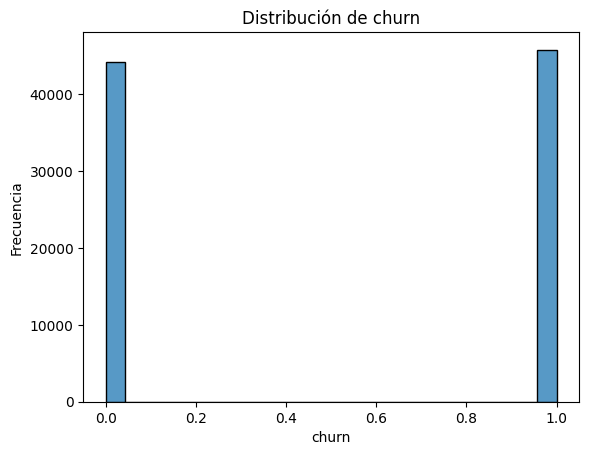

In [15]:
sns.histplot(data=df, x='churn')
plt.title(f"Distribución de churn")
plt.ylabel('Frecuencia')
plt.show()

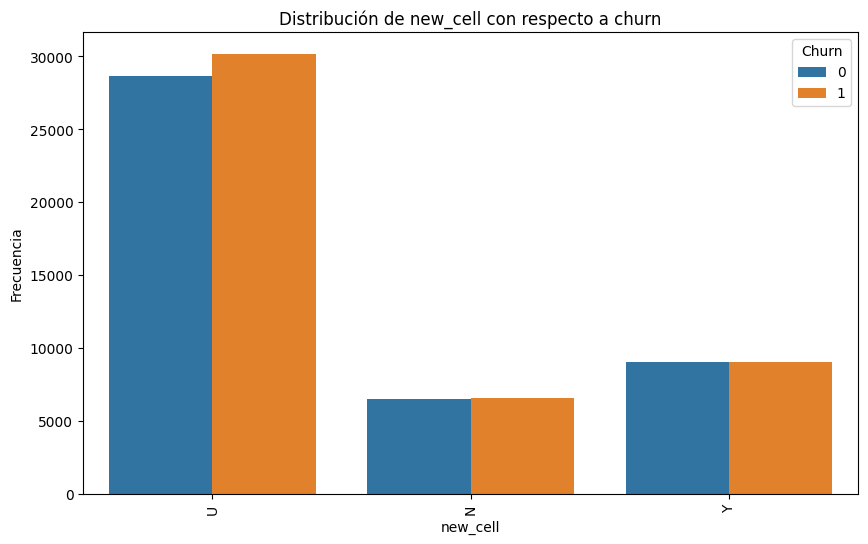

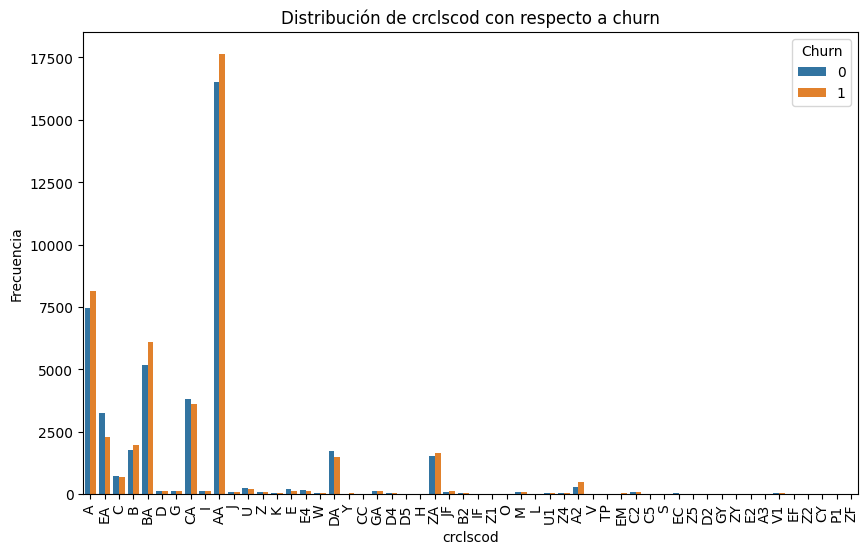

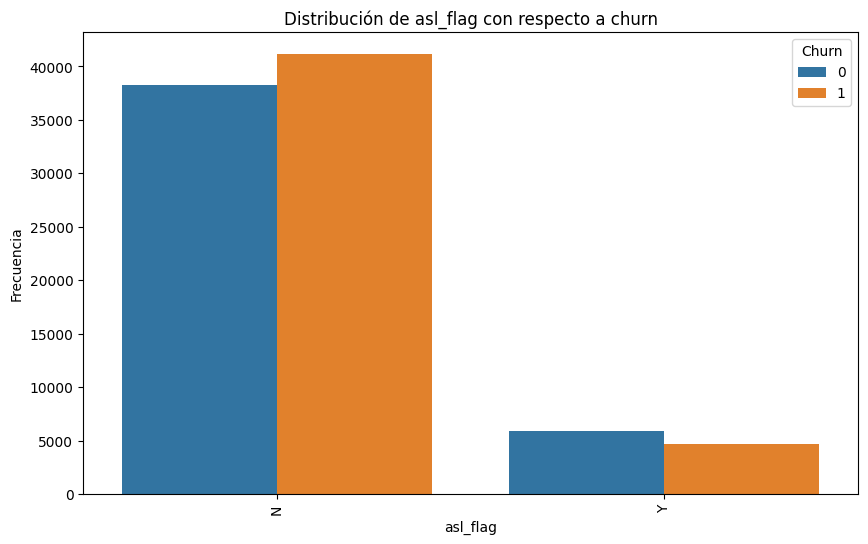

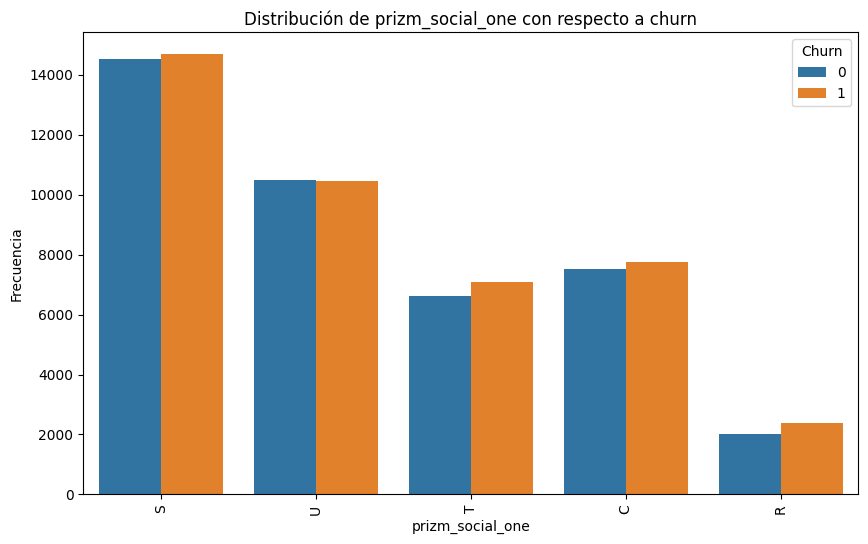

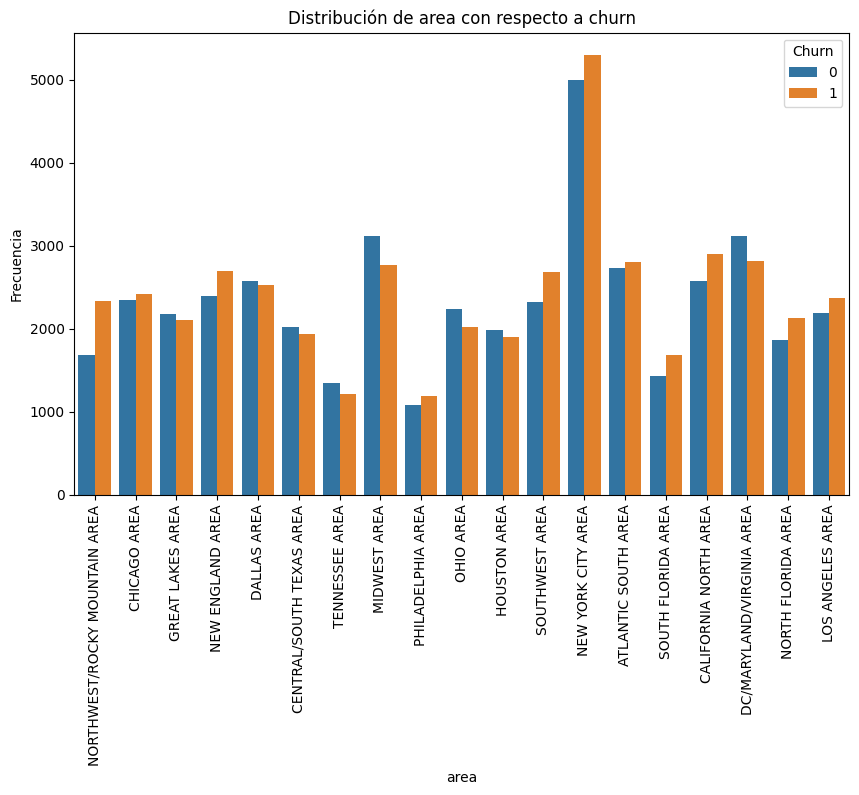

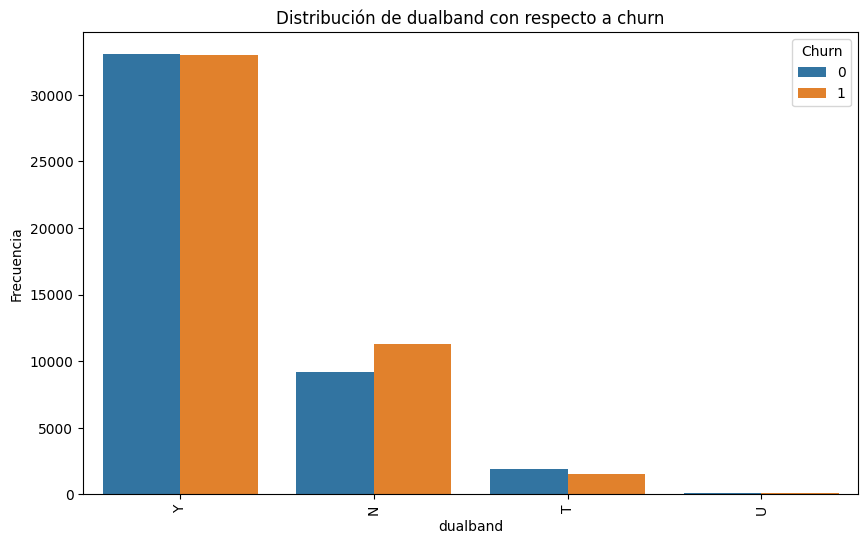

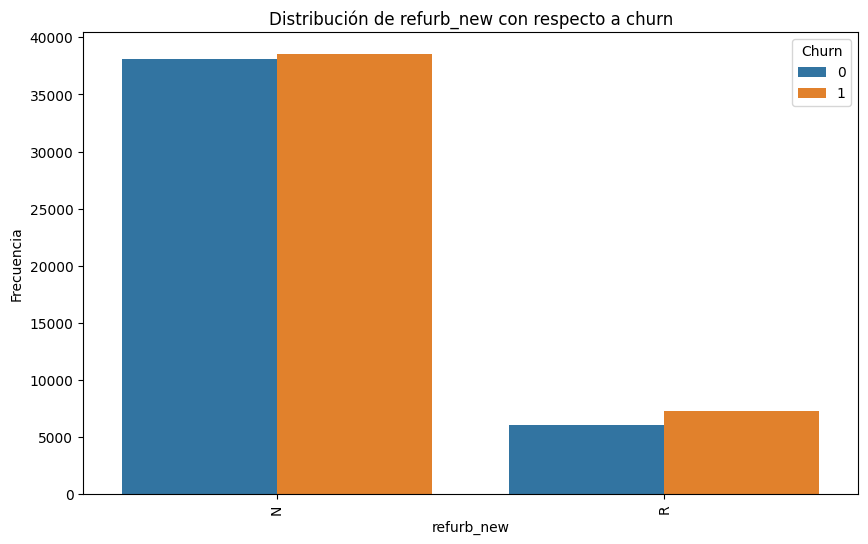

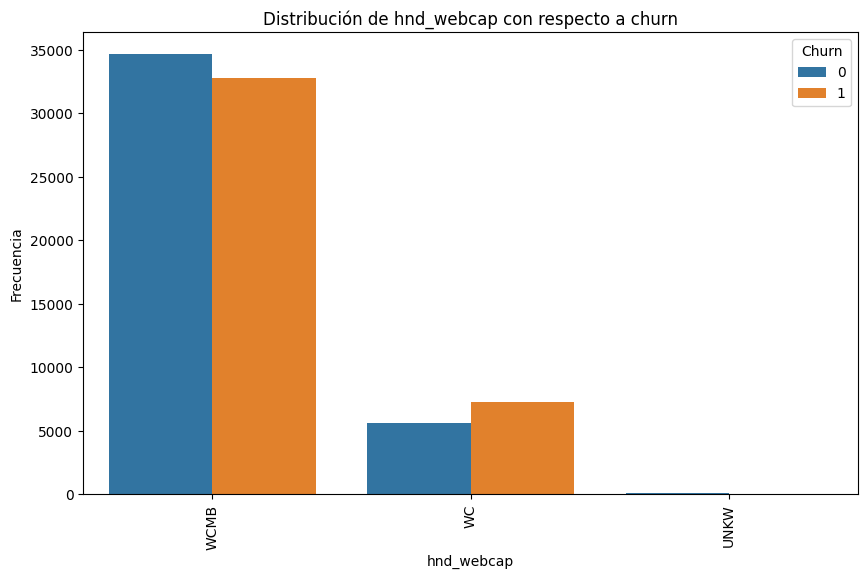

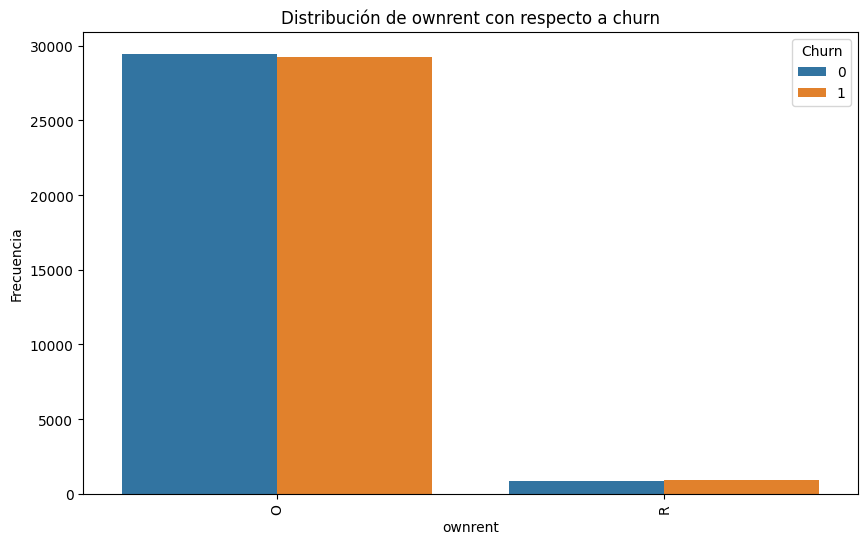

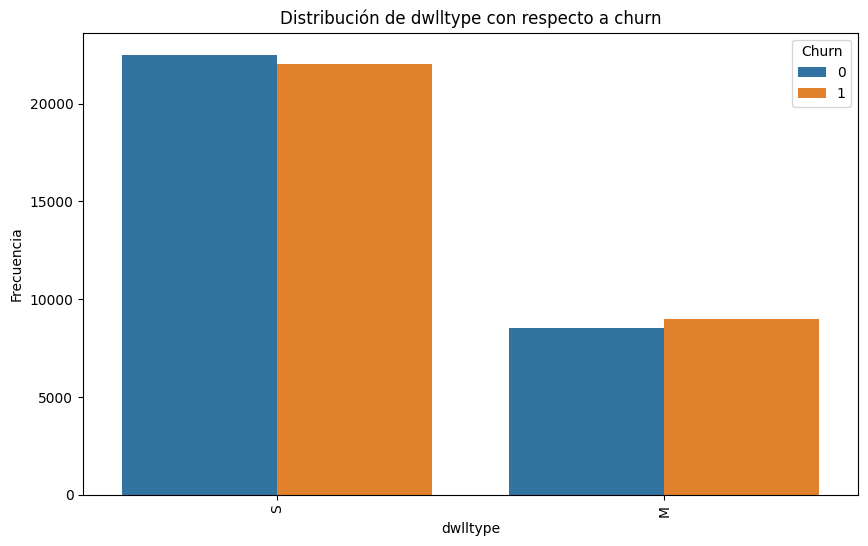

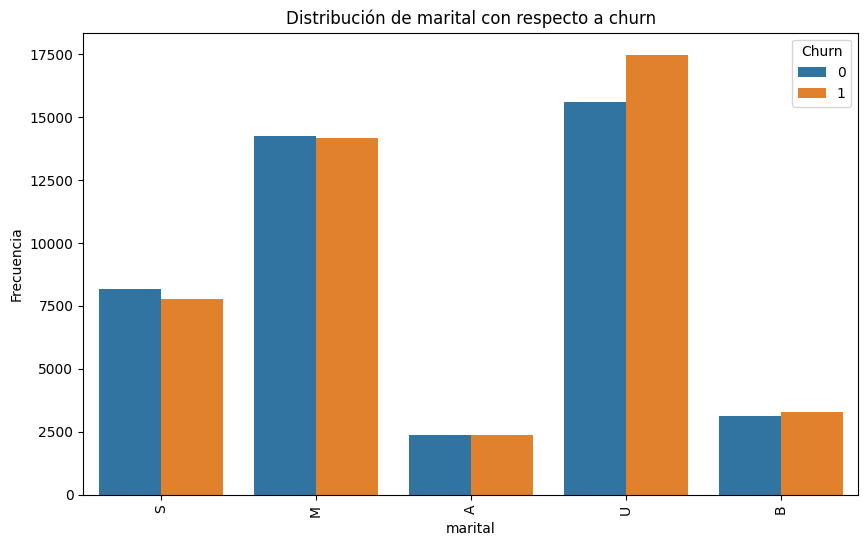

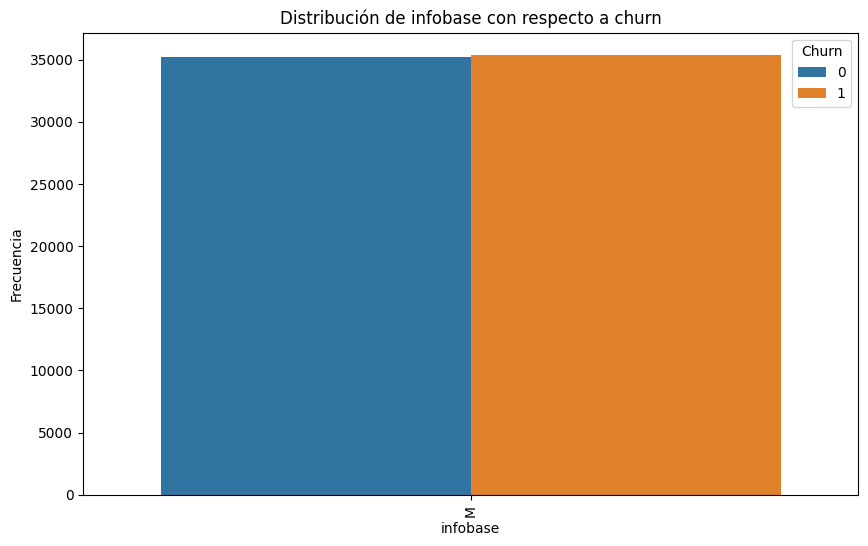

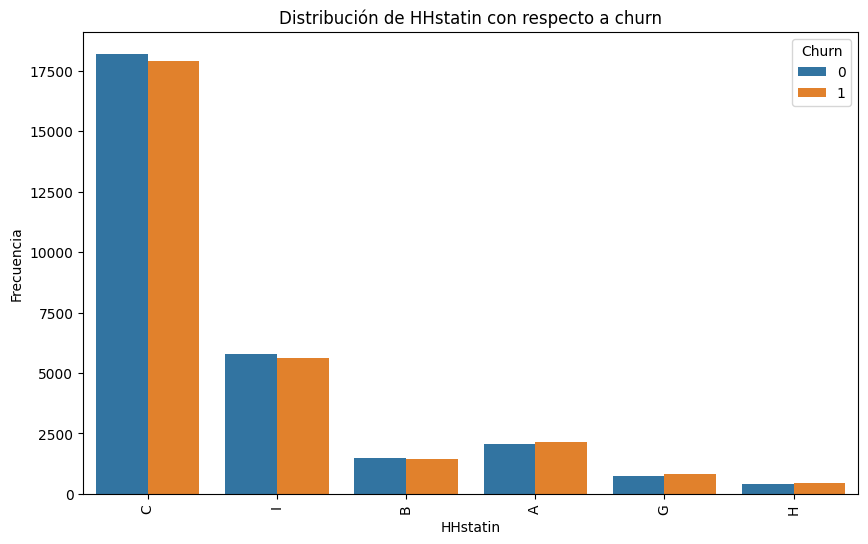

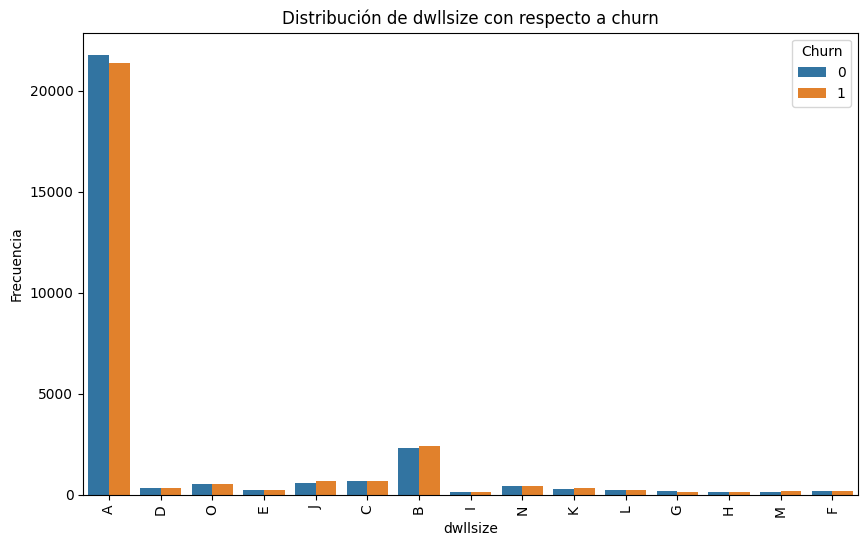

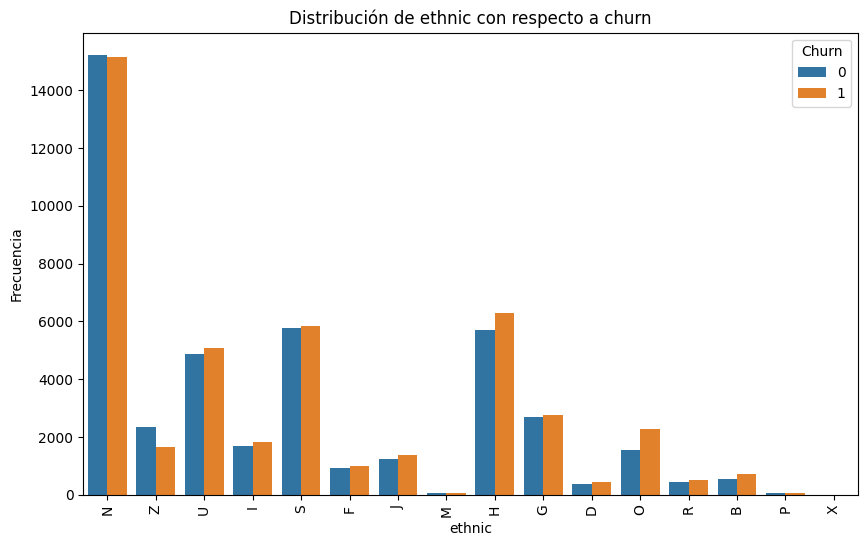

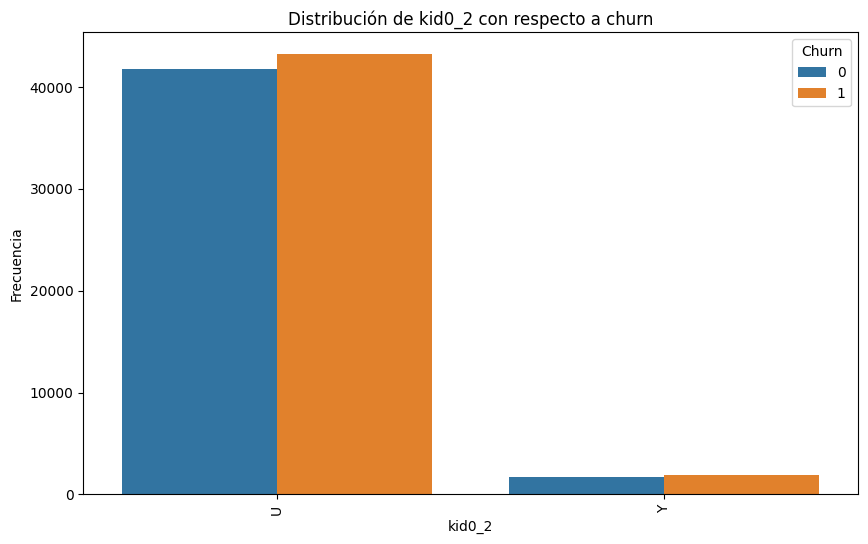

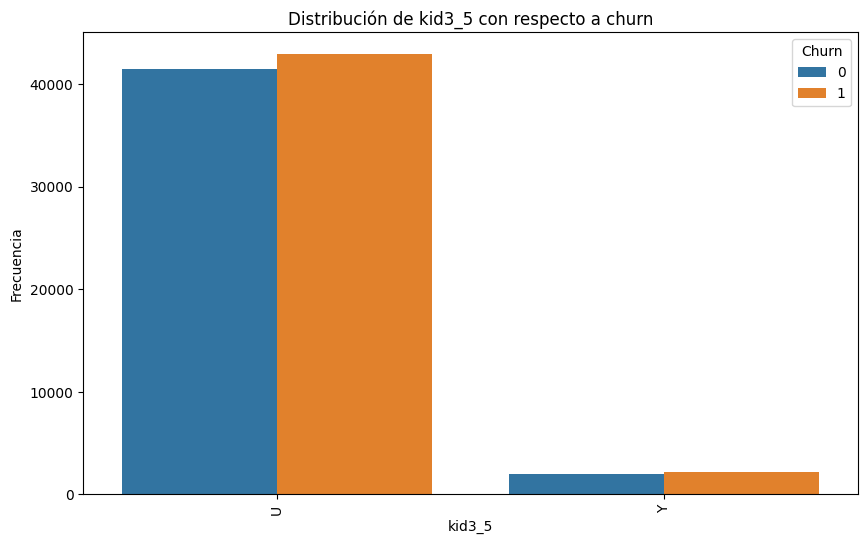

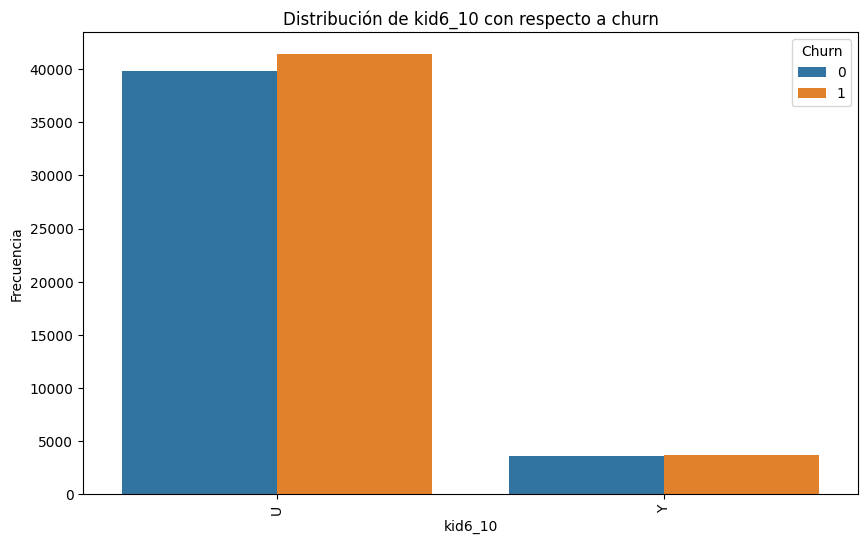

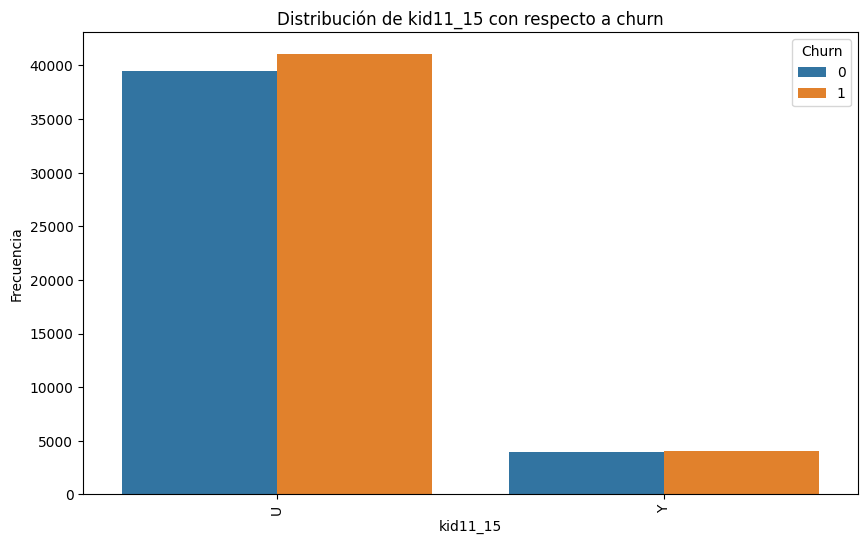

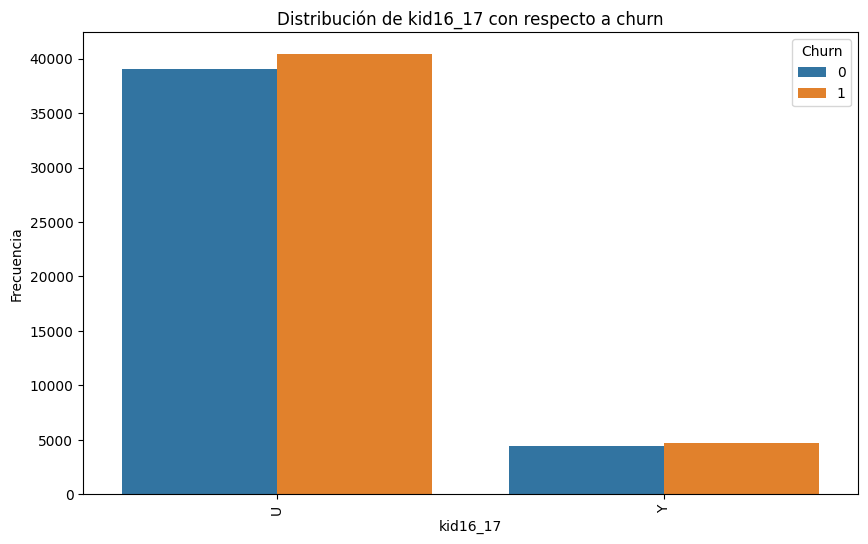

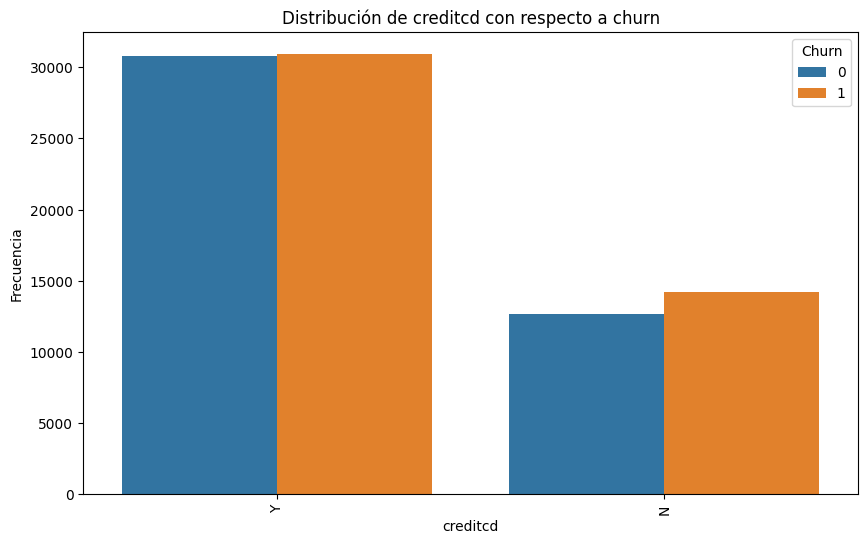

In [16]:
# Gráficos de barras para variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='churn')
    plt.title(f"Distribución de {col} con respecto a churn")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', loc='upper right')
    plt.xticks(rotation=90)
    plt.show()

## Analisis de las variables con el target

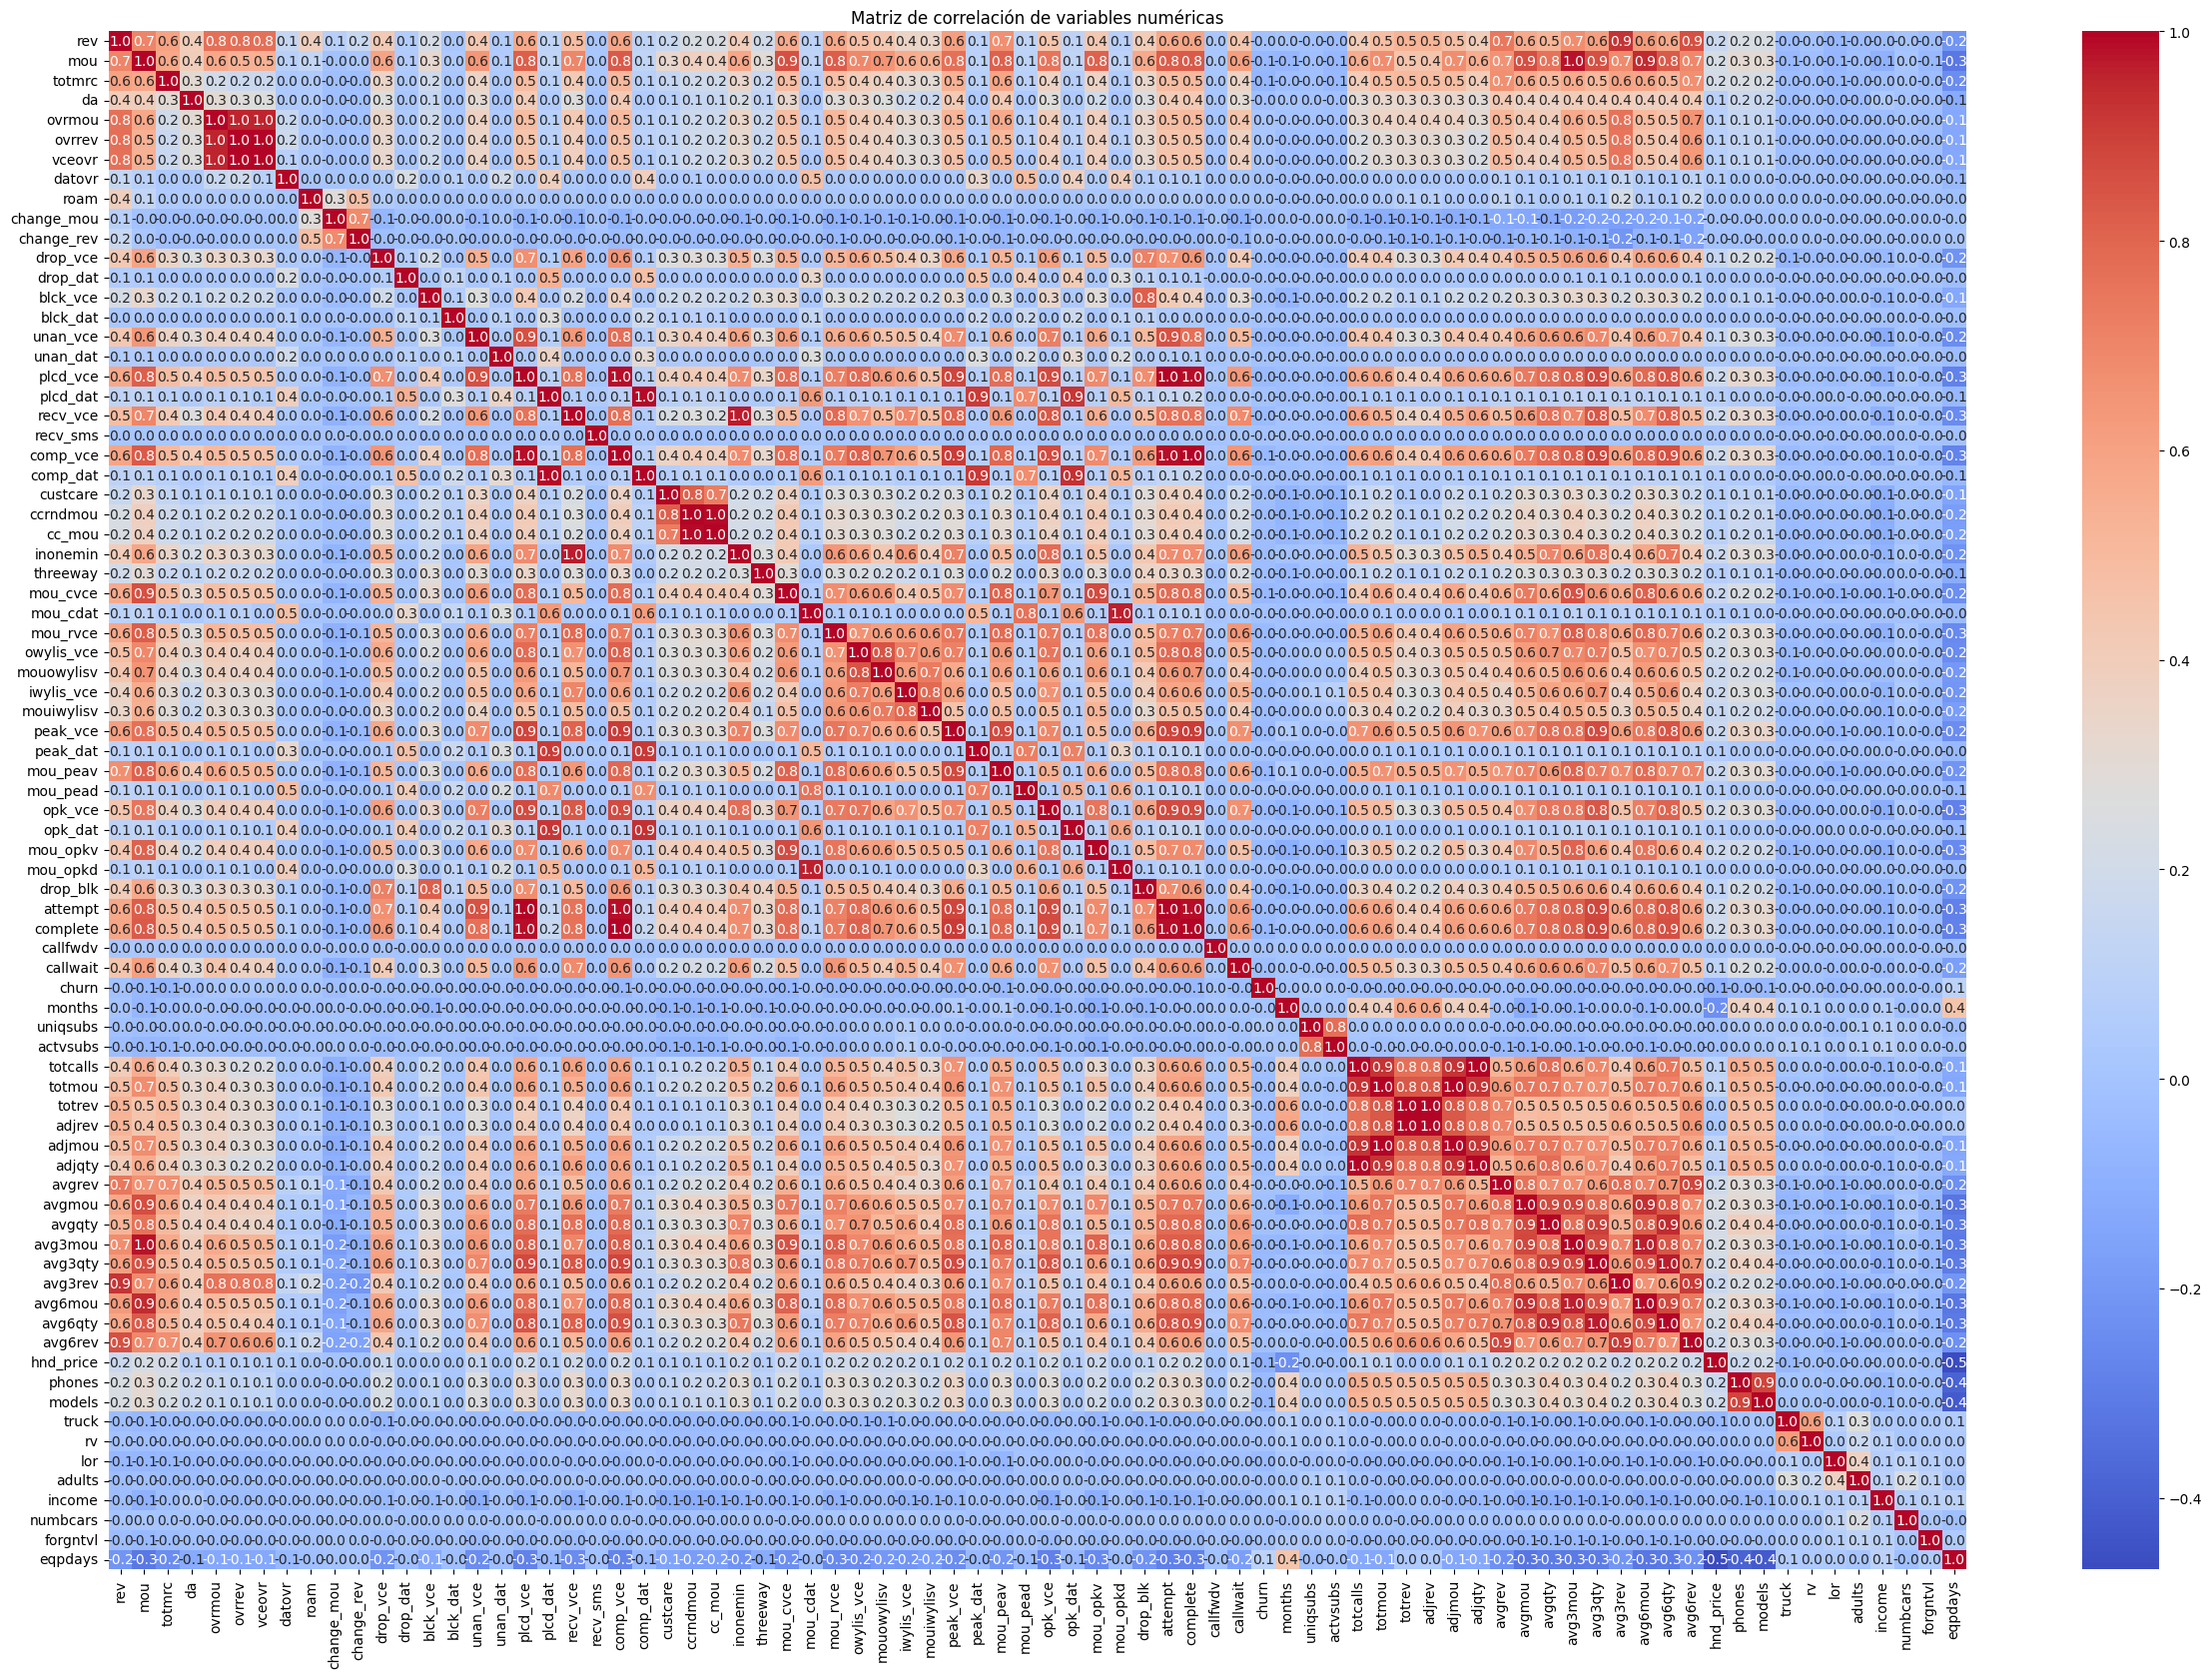

In [17]:
# Matriz de correlación para variables numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(30, 20))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

In [18]:
# las 10 mas correlacionadas con la target son:
numerical_corr_cols = df[numerical_cols].corr()['churn'].abs().sort_values(ascending=False)[1:11].index

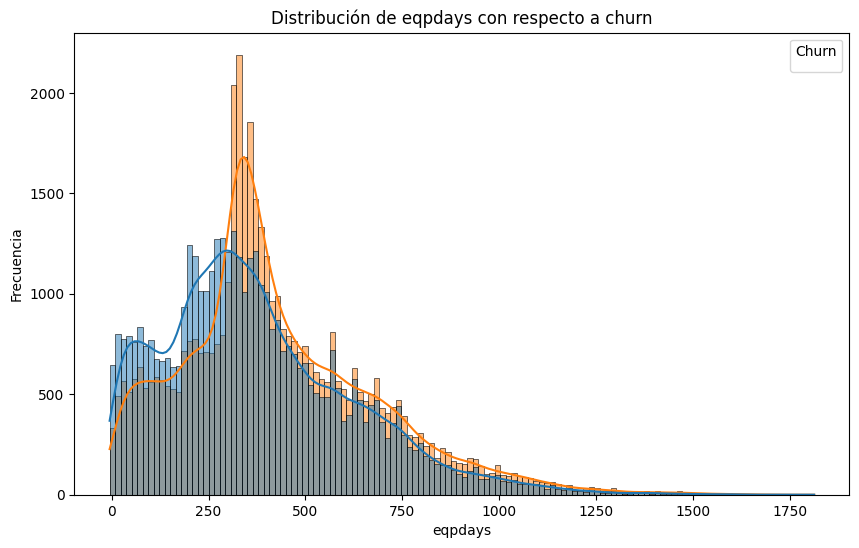

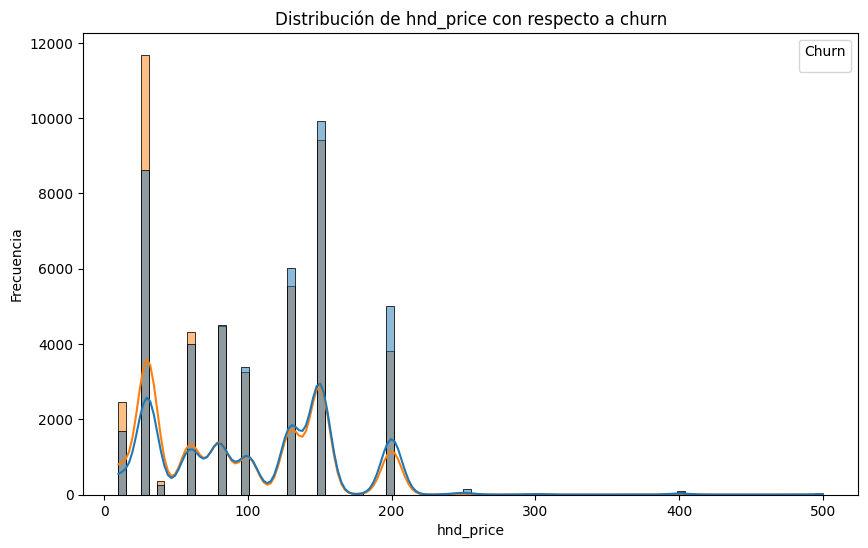

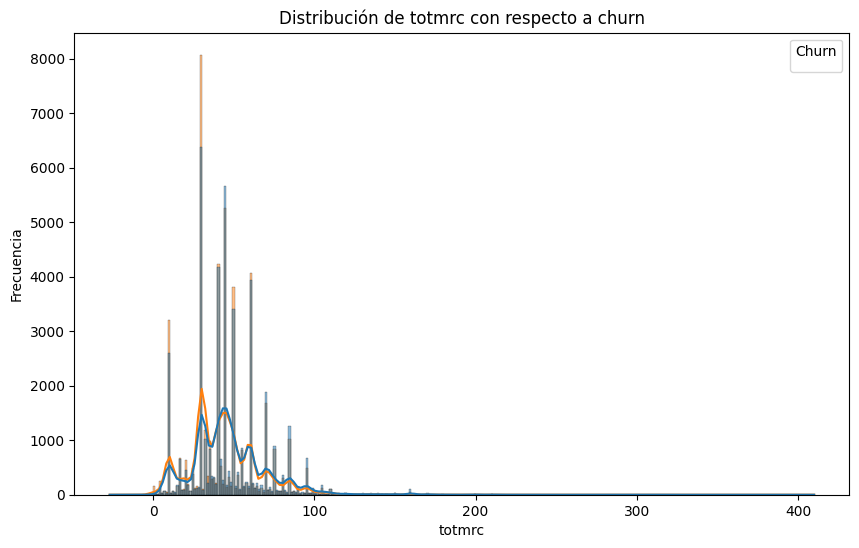

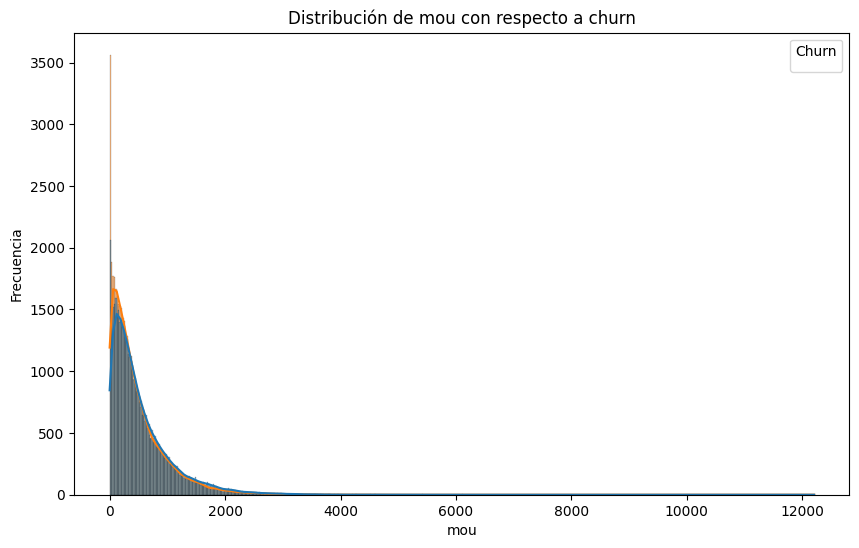

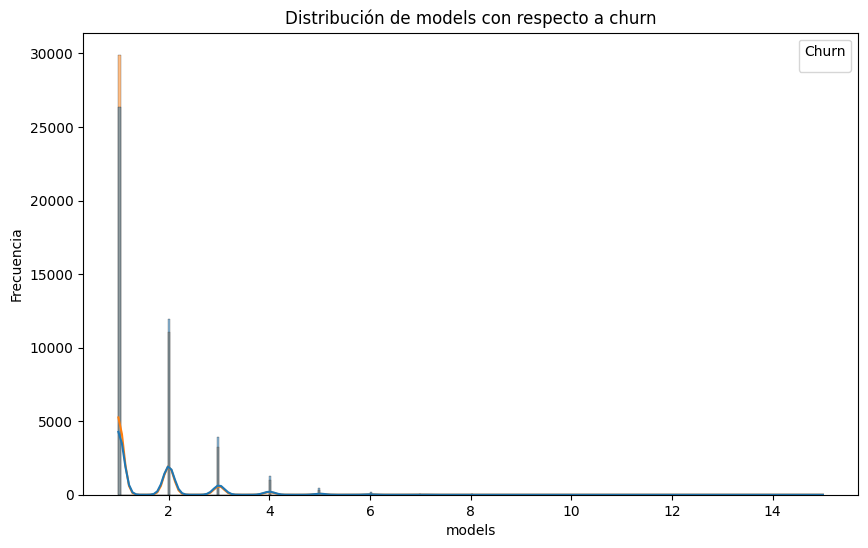

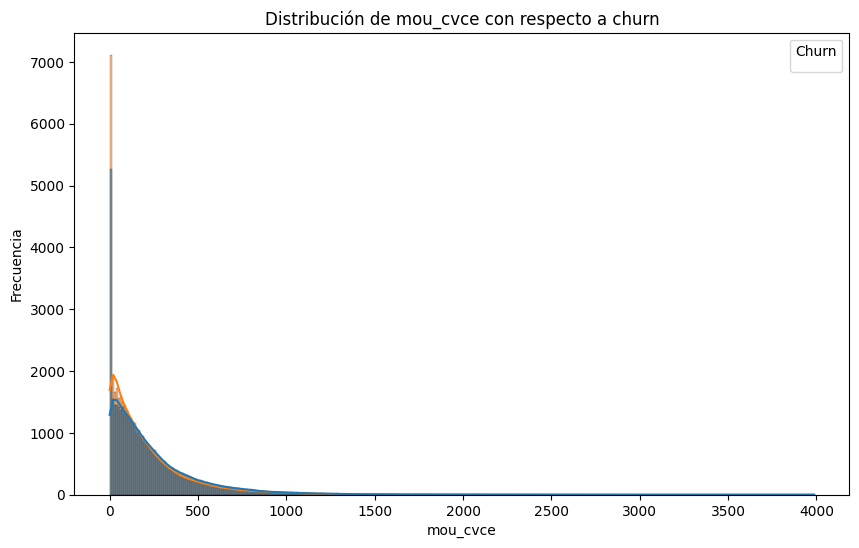

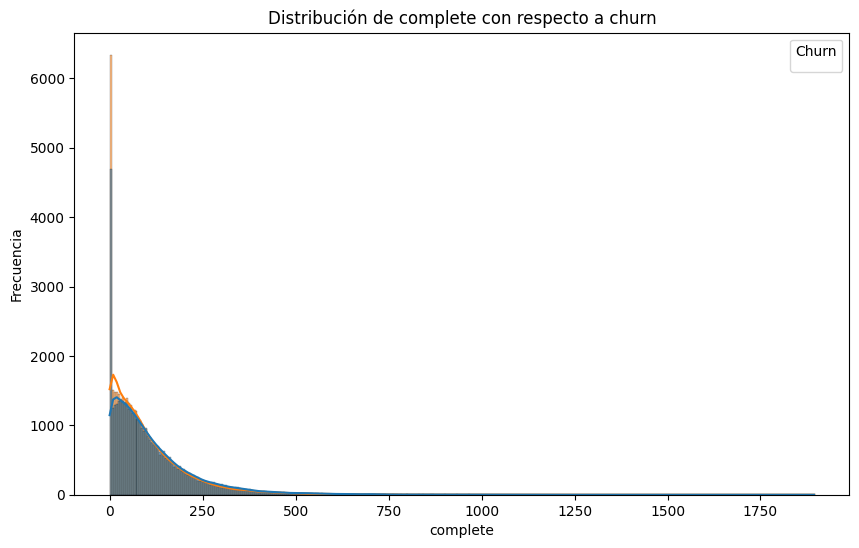

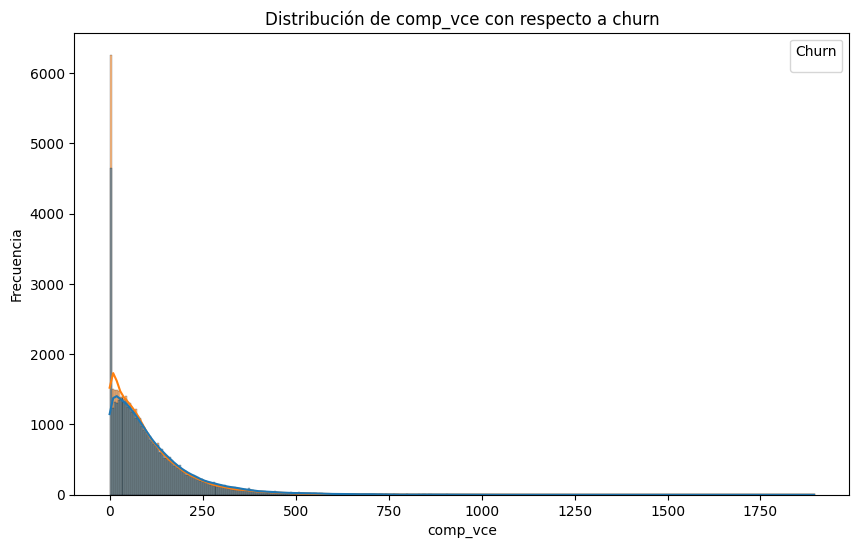

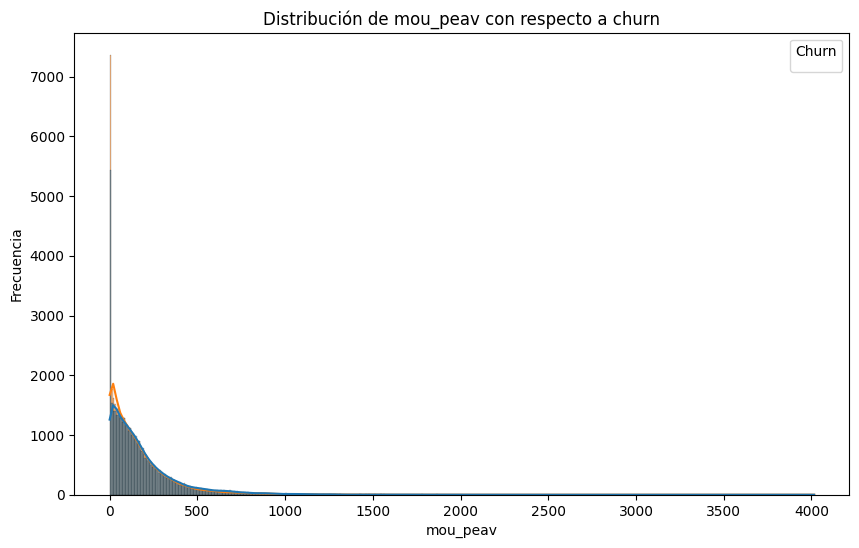

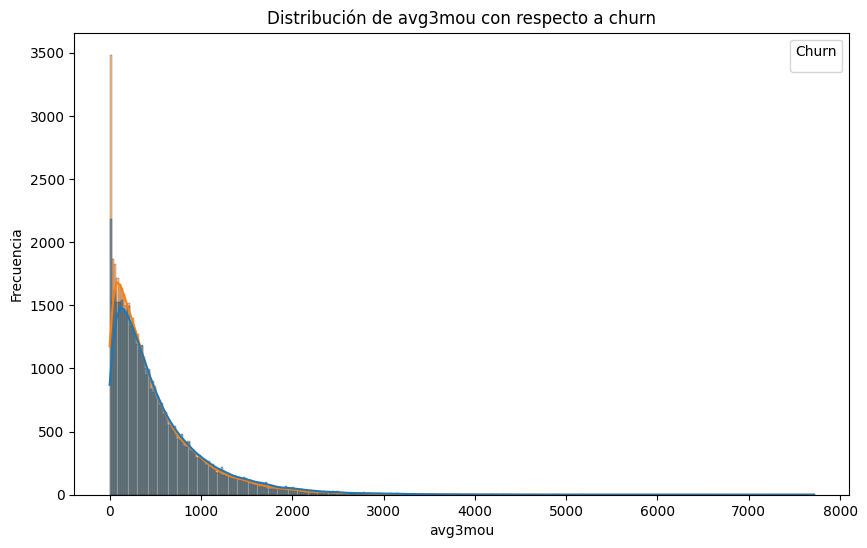

In [19]:
# Realizar análisis de distribución y relación con la variable objetivo (churn)
# Histogramas para variables numéricas mas correlacionadas
for col in numerical_corr_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='churn', kde=True)
    plt.title(f"Distribución de {col} con respecto a churn")
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.legend(title='Churn', loc='upper right')
    plt.show()

# Imputación de nulos
* MODELOS DE ARBOLES: Imputar valor outlier.
* MODELOS LINEALES: imputar media, mediana o moda.
* Si vamos a practicar un Torneo de Modelos, preferible imputar valor outlier.

In [20]:
df_churn_num = df.select_dtypes(include=['int64', 'float64'])
df_churn_num.isna().sum().sort_values(ascending=False)

numbcars    43568
lor         26502
income      22196
adults      20033
forgntvl     1451
            ...  
callfwdv        0
callwait        0
churn           0
months          0
opk_vce         0
Length: 78, dtype: int64

In [21]:
# rellenar
def fill_num_na(df_churn_num, columnas_rellenar):
    for col in columnas_rellenar:
        # Proporciones calculadas
        value_counts = df_churn_num[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df_churn_num[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df_churn_num.loc[df_churn_num[col].isna(), col] = fill_values

    return df_churn_num

# Columnas a rellenar
columnas_rellenar = ['lor', 'adults', 'income', 'numbcars']

# Rellenando
df = fill_num_na(df, columnas_rellenar)

In [22]:
df_churn_num.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         89866 non-null  float64
 1   mou         89866 non-null  float64
 2   totmrc      89866 non-null  float64
 3   da          89866 non-null  float64
 4   ovrmou      89866 non-null  float64
 5   ovrrev      89866 non-null  float64
 6   vceovr      89866 non-null  float64
 7   datovr      89866 non-null  float64
 8   roam        89866 non-null  float64
 9   change_mou  89405 non-null  float64
 10  change_rev  89405 non-null  float64
 11  drop_vce    90000 non-null  float64
 12  drop_dat    90000 non-null  float64
 13  blck_vce    90000 non-null  float64
 14  blck_dat    90000 non-null  float64
 15  unan_vce    90000 non-null  float64
 16  unan_dat    90000 non-null  float64
 17  plcd_vce    90000 non-null  float64
 18  plcd_dat    90000 non-null  float64
 19  recv_vce    90000 non-nul

In [23]:
# para categoricas
df.select_dtypes(include=['object']).isna().sum()

new_cell                0
crclscod                0
asl_flag                0
prizm_social_one     6537
area                   40
dualband                1
refurb_new              1
hnd_webcap           9519
ownrent             29491
dwlltype            27978
marital              1451
infobase            19403
HHstatin            33032
dwllsize            33764
ethnic               1451
kid0_2               1451
kid3_5               1451
kid6_10              1451
kid11_15             1451
kid16_17             1451
creditcd             1451
dtype: int64

In [24]:
cat_columns = df.select_dtypes(include=['object'])

# Rellenar nulos de forma proporcional con los valores de la columna
for col in df:
    if(col not in cat_columns.columns): continue

    if(df[col].value_counts().index.size == 1):
        # En caso de que la columna solo tenga un mismo valor, se rellena con 'None'
        df[col] = df[col].fillna('None')
    else:
        # Proporciones calculadas
        value_counts = df[col].value_counts(normalize=True)

        # Lista de valores para rellenar
        fill_values = np.random.choice(value_counts.index, size=df[col].isna().sum(), p=value_counts.values)

        # Rellenando los nulos
        df.loc[df[col].isna(), col] = fill_values

In [25]:
df.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          90000 non-null  object
 1   crclscod          90000 non-null  object
 2   asl_flag          90000 non-null  object
 3   prizm_social_one  90000 non-null  object
 4   area              90000 non-null  object
 5   dualband          90000 non-null  object
 6   refurb_new        90000 non-null  object
 7   hnd_webcap        90000 non-null  object
 8   ownrent           90000 non-null  object
 9   dwlltype          90000 non-null  object
 10  marital           90000 non-null  object
 11  infobase          90000 non-null  object
 12  HHstatin          90000 non-null  object
 13  dwllsize          90000 non-null  object
 14  ethnic            90000 non-null  object
 15  kid0_2            90000 non-null  object
 16  kid3_5            90000 non-null  object
 17  kid6_10     

In [26]:
df['infobase'].value_counts()

infobase
M       70597
None    19403
Name: count, dtype: int64

# Encoding categóricos
* Si tienen sentido ordinal, es decir, se pueden ordenar, encodear con una escala numerica. Ejemplo: {"Bajo":1, "Medio":2, "Alto":3}.
* Si tienen unicamente 2 clases, indicador booleano
* One Hot Encoding en resto de categoricos

In [27]:
columnas_booleanas = cat_columns.columns[cat_columns.nunique() == 2].to_list()
columnas_booleanas

['asl_flag',
 'refurb_new',
 'ownrent',
 'dwlltype',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd']

In [28]:
# Ver de entre las columnas con 3 categorias, si alguna una de ellas es poco significativas
for col in cat_columns.columns[cat_columns.nunique() == 3]:
    print(df[col].value_counts(normalize = True)*100, '\n')

new_cell
U    65.346667
Y    20.126667
N    14.526667
Name: proportion, dtype: float64 

hnd_webcap
WCMB    83.765556
WC      15.978889
UNKW     0.255556
Name: proportion, dtype: float64 



In [29]:
# Como la opcion UNKW es poco significativa se deja como None para que ahora esta sea una columna booleana
df['hnd_webcap'] = cat_columns['hnd_webcap'].apply(lambda x: np.nan if x == 'UNKW' else  x )

In [30]:
df['hnd_webcap'].value_counts(normalize = True)*100

hnd_webcap
WCMB    83.952217
WC      16.047783
Name: proportion, dtype: float64

In [31]:
columnas_booleanas.append('hnd_webcap')

In [32]:
columnas_booleanas

['asl_flag',
 'refurb_new',
 'ownrent',
 'dwlltype',
 'kid0_2',
 'kid3_5',
 'kid6_10',
 'kid11_15',
 'kid16_17',
 'creditcd',
 'hnd_webcap']

In [33]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76707 entries, 0 to 89998
Data columns (total 99 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev               76707 non-null  float64
 1   mou               76707 non-null  float64
 2   totmrc            76707 non-null  float64
 3   da                76707 non-null  float64
 4   ovrmou            76707 non-null  float64
 5   ovrrev            76707 non-null  float64
 6   vceovr            76707 non-null  float64
 7   datovr            76707 non-null  float64
 8   roam              76707 non-null  float64
 9   change_mou        76707 non-null  float64
 10  change_rev        76707 non-null  float64
 11  drop_vce          76707 non-null  float64
 12  drop_dat          76707 non-null  float64
 13  blck_vce          76707 non-null  float64
 14  blck_dat          76707 non-null  float64
 15  unan_vce          76707 non-null  float64
 16  unan_dat          76707 non-null  float64
 17

### label encoding para las booleanas

In [34]:
for col in columnas_booleanas:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [35]:
df[columnas_booleanas].nunique()

asl_flag      2
refurb_new    2
ownrent       2
dwlltype      2
kid0_2        2
kid3_5        2
kid6_10       2
kid11_15      2
kid16_17      2
creditcd      2
hnd_webcap    2
dtype: int64

### resto de categoricos

In [36]:
columnas_object = df.select_dtypes(include=['object'])
columnas_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76707 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   new_cell          76707 non-null  object
 1   crclscod          76707 non-null  object
 2   prizm_social_one  76707 non-null  object
 3   area              76707 non-null  object
 4   dualband          76707 non-null  object
 5   marital           76707 non-null  object
 6   infobase          76707 non-null  object
 7   HHstatin          76707 non-null  object
 8   dwllsize          76707 non-null  object
 9   ethnic            76707 non-null  object
dtypes: object(10)
memory usage: 6.4+ MB


In [37]:
columnas_object = df.select_dtypes(include=['object']).columns.tolist()
for columna in columnas_object:
    print(df[columna].value_counts(normalize = True).cumsum()*100, df[columna].value_counts(normalize = True)*100, '\n')
    print("\n")

new_cell
U     66.181704
Y     85.870911
N    100.000000
Name: proportion, dtype: float64 new_cell
U    66.181704
Y    19.689207
N    14.129089
Name: proportion, dtype: float64 



crclscod
AA     39.965062
A      55.383472
BA     68.296244
CA     76.824801
EA     83.174938
B      87.020741
ZA     90.754429
DA     94.460740
C      95.911716
A2     96.482720
U      96.958557
E      97.296205
E4     97.614299
GA     97.899801
D      98.148800
G      98.388674
JF     98.624637
Z      98.814971
M      98.988358
C2     99.113510
I      99.224321
D4     99.331221
W      99.427692
Z4     99.517645
U1     99.581525
EM     99.636278
V1     99.679299
B2     99.719713
EC     99.751001
J      99.777074
E2     99.799236
O      99.821398
CY     99.842257
D5     99.861812
CC     99.878759
C5     99.895707
K      99.912655
Y      99.924388
ZY     99.936121
Z1     99.945246
H      99.954372
Z5     99.963497
GY     99.970016
TP     99.976534
D2     99.983052
A3     99.986963
IF     99.990874
Z2     99.9

#### reducir la cardinalidad

In [38]:
# Agrupar valores en categoria 'otros' para columnas: crl < 1%, dwllsize < 1%, ethnic <1%
for columna in  ['crclscod','dwllsize', 'ethnic' ]:
  value_counts = df[columna].value_counts(normalize = True)
  limite = 0.01
  valores_filtrados = value_counts[value_counts > limite].index

  df[columna] = df[columna].apply(lambda x: x if x in valores_filtrados else 'otros')


In [39]:
for col in ['crclscod','dwllsize', 'ethnic']:
    print(df[ col ].value_counts(normalize = True),'\n\n')

crclscod
AA       0.399651
A        0.154184
BA       0.129128
CA       0.085286
EA       0.063501
otros    0.040883
B        0.038458
ZA       0.037337
DA       0.037063
C        0.014510
Name: proportion, dtype: float64 


dwllsize
A        0.763620
B        0.085051
otros    0.044598
C        0.024887
J        0.022723
O        0.019724
N        0.016257
D        0.011889
K        0.011251
Name: proportion, dtype: float64 


ethnic
N        0.340647
H        0.138345
S        0.129727
U        0.111958
G        0.060894
Z        0.045094
O        0.044598
I        0.039762
J        0.029723
F        0.021510
B        0.014679
otros    0.011929
R        0.011133
Name: proportion, dtype: float64 




### MinMaxScaler para las numericas

In [40]:
df.dropna(inplace=True)
df_churn_num = df.select_dtypes(include=['int64', 'float64'])

In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_churn_num)
df_churn_num = pd.DataFrame(X_scaled, columns=df_churn_num.columns)

In [42]:
df_churn_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76707 entries, 0 to 76706
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rev         76707 non-null  float64
 1   mou         76707 non-null  float64
 2   totmrc      76707 non-null  float64
 3   da          76707 non-null  float64
 4   ovrmou      76707 non-null  float64
 5   ovrrev      76707 non-null  float64
 6   vceovr      76707 non-null  float64
 7   datovr      76707 non-null  float64
 8   roam        76707 non-null  float64
 9   change_mou  76707 non-null  float64
 10  change_rev  76707 non-null  float64
 11  drop_vce    76707 non-null  float64
 12  drop_dat    76707 non-null  float64
 13  blck_vce    76707 non-null  float64
 14  blck_dat    76707 non-null  float64
 15  unan_vce    76707 non-null  float64
 16  unan_dat    76707 non-null  float64
 17  plcd_vce    76707 non-null  float64
 18  plcd_dat    76707 non-null  float64
 19  recv_vce    76707 non-nul

In [43]:
df_churn_num.head()

rev       mou    totmrc        da  ovrmou  ovrrev  vceovr  datovr  \
0  0.007758  0.017961  0.113102  0.001553     0.0     0.0     0.0     0.0   
1  0.015872  0.046736  0.226354  0.000000     0.0     0.0     0.0     0.0   
2  0.022898  0.107502  0.233266  0.007764     0.0     0.0     0.0     0.0   
3  0.011409  0.055912  0.181744  0.001553     0.0     0.0     0.0     0.0   
4  0.009749  0.002089  0.130246  0.001553     0.0     0.0     0.0     0.0   

   roam  change_mou  change_rev  drop_vce  drop_dat  blck_vce  blck_dat  \
0   0.0    0.093839    0.098338  0.002865       0.0  0.001730       0.0   
1   0.0    0.099492    0.100054  0.041547       0.0  0.001730       0.0   
2   0.0    0.102908    0.100790  0.223496       0.0  0.019896       0.0   
3   0.0    0.102640    0.099778  0.038682       0.0  0.004325       0.0   
4   0.0    0.100099    0.100418  0.000000       0.0  0.002595       0.0   

   unan_vce  unan_dat  plcd_vce  plcd_dat  recv_vce  recv_sms  comp_vce  \
0  0.007463       0.0  0.022863       0.0  0.012564       0.0  0.023755   
1  0.090731       0.0  0.097131       0.0  0.028097       0.0  0.072321   
2  0.089552       0.0  0.306684       0.0  0.108330       0.0  0.304769   
3  0.015318       0.0  0.042377       0.0  0.003858       0.0  0.038712   
4  0.002749       0.0  0.002912       0.0  0.000000       0.0  0.001760   

   comp_dat  custcare  ccrndmou    cc_mou  inonemin  threeway  mou_cvce  \
0       0.0  0.000000  0.000000  0.000000  0.005832  0.000000  0.022732   
1       0.0  0.012833  0.017415  0.018371  0.021382  0.000000  0.071531   
2       0.0  0.006417  0.012771  0.012859  0.097732  0.020202  0.092673   
3       0.0  0.000987  0.006192  0.008751  0.001620  0.000000  0.117873   
4       0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000953   

   mou_cdat  mou_rvce  owylis_vce  mouowylisv  iwylis_vce  mouiwylisv  \
0       0.0  0.036093    0.000000    0.000000    0.000000    0.000000   
1       0.0  0.039492    0.022763    0.006000    0.001284    0.000215   
2       0.0  0.074402    0.574754    0.134916    0.283055    0.049982   
3       0.0  0.015672    0.010347    0.003456    0.000000    0.000000   
4       0.0  0.000000    0.000000    0.000000    0.000000    0.000000   

   peak_vce  peak_dat  mou_peav  mou_pead   opk_vce  opk_dat  mou_opkv  \
0  0.027742       0.0  0.033023       0.0  0.014604      0.0  0.017734   
1  0.046556       0.0  0.043203       0.0  0.054970      0.0  0.070037   
2  0.265784       0.0  0.095159       0.0  0.184787      0.0  0.060298   
3  0.015944       0.0  0.020189       0.0  0.032252      0.0  0.138462   
4  0.000797       0.0  0.000465       0.0  0.001014      0.0  0.000621   

   mou_opkd  drop_blk   attempt  complete  callfwdv  callwait  churn  \
0       0.0  0.003175  0.022863  0.023755       0.0  0.001567    1.0   
1       0.0  0.024603  0.097131  0.072321       0.0  0.000000    0.0   
2       0.0  0.142063  0.306684  0.304769       0.0  0.106583    0.0   
3       0.0  0.025397  0.042377  0.038712       0.0  0.003135    0.0   
4       0.0  0.002381  0.002912  0.001760       0.0  0.000000    0.0   

     months  uniqsubs  actvsubs  totcalls    totmou    totrev    adjrev  \
0  1.000000  0.005128  0.018868  0.016708  0.018113  0.054249  0.053079   
1  0.925926  0.000000  0.018868  0.045361  0.060098  0.079031  0.079435   
2  0.962963  0.005128  0.037736  0.271173  0.175089  0.146907  0.144728   
3  0.851852  0.000000  0.018868  0.045421  0.053517  0.051431  0.051956   
4  0.925926  0.005128  0.037736  0.003955  0.004258  0.052556  0.053241   

     adjmou    adjqty    avgrev    avgmou    avgqty   avg3mou   avg3qty  \
0  0.017543  0.016230  0.029033  0.011842  0.010835  0.035251  0.029675   
1  0.059973  0.045104  0.038834  0.035423  0.026350  0.072317  0.048862   
2  0.173048  0.267079  0.087664  0.121779  0.185903  0.163297  0.245587   
3  0.053419  0.045286  0.034514  0.043094  0.036134  0.082037  0.024559   
4  0.004191  0.003819  0.025614  0.002521  0.0022

### Se le hace onehot encoding

In [44]:
# Identificar colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

In [45]:
categorical_columns

Index(['new_cell', 'crclscod', 'prizm_social_one', 'area', 'dualband',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic'],
      dtype='object')

In [46]:
# One-Hot Encoding usando pandas
#one_hot_encoded_df = pd.get_dummies(final_df[categorical_columns])

encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[categorical_columns])

In [47]:
# Converter os dados codificados para um DataFrame
encoded_columns = encoder.get_feature_names_out(categorical_columns)
one_hot_encoded_df  = pd.DataFrame(encoded_categorical_data, columns=encoded_columns)

In [48]:
#numerical_columns = df.drop(columns=categorical_columns)

In [49]:
final_df = pd.concat([df_churn_num, one_hot_encoded_df], axis=1)

In [50]:
# Exibir DataFrame codificado
print("\nDataFrame Codificado:")
one_hot_encoded_df.info()


DataFrame Codificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76707 entries, 0 to 76706
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   new_cell_N                          76707 non-null  float64
 1   new_cell_U                          76707 non-null  float64
 2   new_cell_Y                          76707 non-null  float64
 3   crclscod_A                          76707 non-null  float64
 4   crclscod_AA                         76707 non-null  float64
 5   crclscod_B                          76707 non-null  float64
 6   crclscod_BA                         76707 non-null  float64
 7   crclscod_C                          76707 non-null  float64
 8   crclscod_CA                         76707 non-null  float64
 9   crclscod_DA                         76707 non-null  float64
 10  crclscod_EA                         76707 non-null  float64
 11  crclscod_ZA       

In [51]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76707 entries, 0 to 76706
Columns: 153 entries, rev to ethnic_otros
dtypes: float64(153)
memory usage: 89.5 MB


# Eliminar alta correlación

* Analizar variables (X) altamente correlacionadas
* Eliminar una variable de cada pareja altamente correlacionada (>95% o >99%...) en el dataset (df)

In [52]:
# Calcular la matriz de correlación
corr_matrix = final_df.corr().abs()

threshold = 0.95
target_column = 'churn'
to_drop = []

In [53]:
# Encontrar los pares de columnas con correlación alta
high_correlation_pairs = []
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        if(corr_matrix.iloc[i, j] > threshold and cols[i] != target_column and cols[j] != target_column):
            high_correlation_pairs.append((cols[i], cols[j]))

# Mostrar los pares de columnas con alta correlación
for pair in high_correlation_pairs:
    print(pair)

('mou', 'avg3mou')
('ovrmou', 'ovrrev')
('ovrmou', 'vceovr')
('ovrrev', 'vceovr')
('plcd_vce', 'comp_vce')
('plcd_vce', 'attempt')
('plcd_vce', 'complete')
('plcd_dat', 'comp_dat')
('recv_vce', 'inonemin')
('comp_vce', 'attempt')
('comp_vce', 'complete')
('ccrndmou', 'cc_mou')
('mou_cdat', 'mou_opkd')
('attempt', 'complete')
('totcalls', 'adjqty')
('totmou', 'adjmou')
('totrev', 'adjrev')
('avg3mou', 'avg6mou')
('avg3qty', 'avg6qty')
('infobase_M', 'infobase_None')


In [54]:
# hay una correlacion entre 3, mou - avg3mou - avg6mou
print(corr_matrix[target_column]['mou'])
print(corr_matrix[target_column]['avg3mou']) # eliminar la intermedia
print(corr_matrix[target_column]['avg6mou'])

to_drop.append('avg3mou')

0.0501917659923233
0.0430437619243765
0.03457454083909496


In [55]:
# estas 3 estan correlacionadas entre si solo, deberia dejarse 1
print(corr_matrix[target_column]['ovrmou'])
print(corr_matrix[target_column]['ovrrev']) # dejar solo esta
print(corr_matrix[target_column]['vceovr'])

to_drop.append('ovrmou')
to_drop.append('vceovr')

0.019901477422149153
0.025441607275104246
0.02538918628013804


In [56]:
# estas 4 estan correlacionadas entre si, dejar solo 1
print(corr_matrix[target_column]['plcd_vce'])
print(corr_matrix[target_column]['comp_vce'])
print(corr_matrix[target_column]['complete']) # dejar solo esta
print(corr_matrix[target_column]['attempt'])

to_drop.append('plcd_vce')
to_drop.append('comp_vce')
to_drop.append('attempt')


0.03968114434213925
0.043265275179122153
0.04326792469438697
0.03973040510072266


In [57]:
# del resto de pares eliminar el menos correlacionado con la target
high_correlation_pairs = [
    ('recv_vce', 'inonemin'),
    ('plcd_dat', 'comp_dat'),
    ('ccrndmou', 'cc_mou'),
    ('mou_cdat', 'mou_opkd'),
    ('totcalls', 'adjqty'),
    ('totmou', 'adjmou'),
    ('totrev', 'adjrev'),
    ('avg3qty', 'avg6qty'),
    ('infobase_M', 'infobase_None')
]

for pair in high_correlation_pairs:
    col1, col2 = pair

    if corr_matrix[target_column][col1] > corr_matrix[target_column][col2]:
        to_drop.append(col2)
    else:
        to_drop.append(col1)



In [58]:
to_drop

['avg3mou',
 'ovrmou',
 'vceovr',
 'plcd_vce',
 'comp_vce',
 'attempt',
 'inonemin',
 'comp_dat',
 'cc_mou',
 'mou_opkd',
 'totcalls',
 'totmou',
 'totrev',
 'avg6qty',
 'infobase_M']

In [59]:
df_reduced = final_df.drop(columns=to_drop)

# Eliminar baja varianza

* Eliminar variables (X) practicamente constantes con un threshold minimo (1% o menos)

In [60]:
# Umbral de variabilidad mínima
variability_threshold = 0.02

In [61]:
df_reduced.var()

rev             0.000150
mou             0.001849
totmrc          0.002890
da              0.000193
ovrrev          0.000787
                  ...   
ethnic_R        0.011009
ethnic_S        0.112900
ethnic_U        0.099425
ethnic_Z        0.043061
ethnic_otros    0.011786
Length: 138, dtype: float64

In [62]:
low_variability_columns = df_reduced.columns[df_reduced.var() < variability_threshold]
# Mostrar las variables a eliminar
print("Variables eliminadas por baja variabilidad: \n", low_variability_columns.to_list())

Variables eliminadas por baja variabilidad: 
 ['rev', 'mou', 'totmrc', 'da', 'ovrrev', 'datovr', 'roam', 'change_mou', 'change_rev', 'drop_vce', 'drop_dat', 'blck_vce', 'blck_dat', 'unan_vce', 'unan_dat', 'plcd_dat', 'recv_vce', 'recv_sms', 'custcare', 'ccrndmou', 'threeway', 'mou_cvce', 'mou_cdat', 'mou_rvce', 'owylis_vce', 'mouowylisv', 'iwylis_vce', 'mouiwylisv', 'peak_vce', 'peak_dat', 'mou_peav', 'mou_pead', 'opk_vce', 'opk_dat', 'mou_opkv', 'drop_blk', 'complete', 'callfwdv', 'callwait', 'uniqsubs', 'actvsubs', 'adjrev', 'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'avg3qty', 'avg3rev', 'avg6mou', 'avg6rev', 'hnd_price', 'phones', 'models', 'crclscod_C', 'HHstatin_H', 'dwllsize_D', 'dwllsize_K', 'dwllsize_N', 'dwllsize_O', 'ethnic_B', 'ethnic_R', 'ethnic_otros']


In [63]:
# Eliminar las columnas con baja variabilidad
df_reduced = df_reduced.drop(columns=low_variability_columns)

In [64]:
# Mostrar el DataFrame reducido
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76707 entries, 0 to 76706
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   churn                               76707 non-null  float64
 1   months                              76707 non-null  float64
 2   truck                               76707 non-null  float64
 3   rv                                  76707 non-null  float64
 4   lor                                 76707 non-null  float64
 5   adults                              76707 non-null  float64
 6   income                              76707 non-null  float64
 7   numbcars                            76707 non-null  float64
 8   forgntvl                            76707 non-null  float64
 9   eqpdays                             76707 non-null  float64
 10  new_cell_N                          76707 non-null  float64
 11  new_cell_U                          76707

In [65]:
df_reduced.dropna(inplace=True)

In [66]:
corr = df_reduced.corr()

<Axes: >

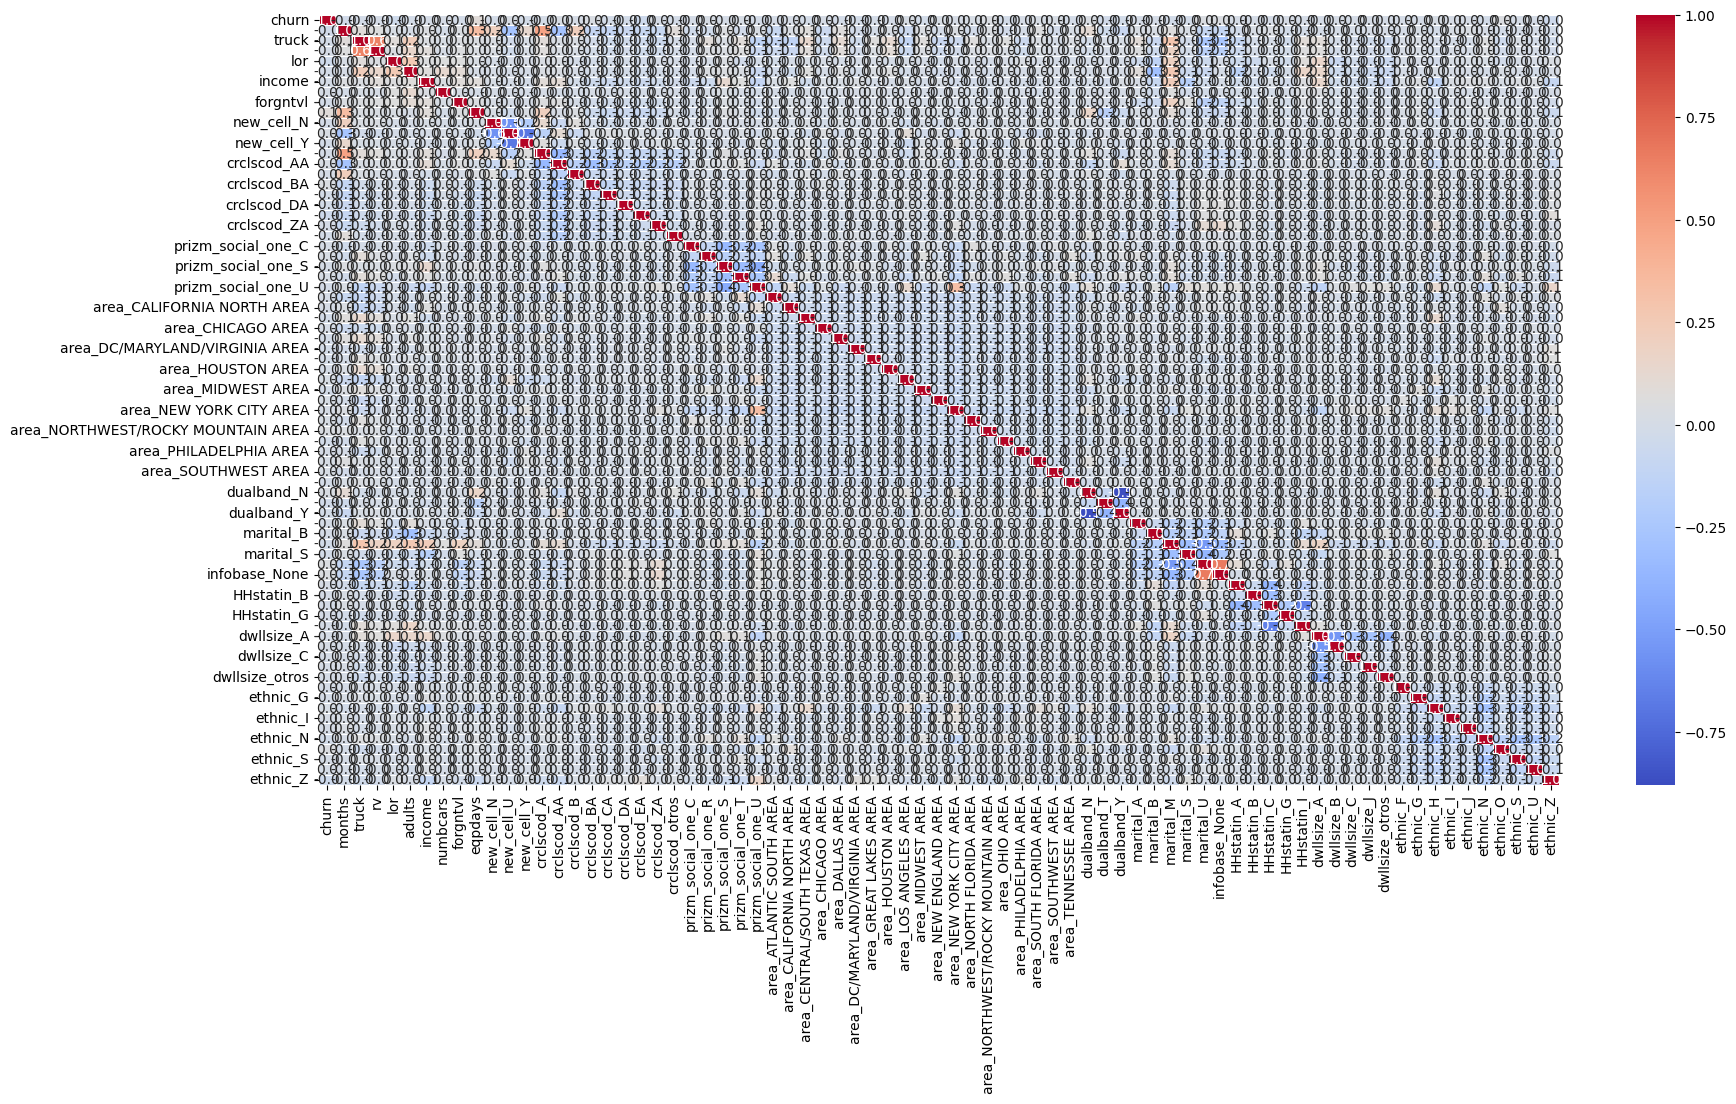

In [67]:
plt.rcParams["figure.figsize"] = 20,10
sns.heatmap(corr,cmap='coolwarm',annot= True, fmt='.1f',linewidths=.5)

In [68]:
df_reduced

churn    months  truck   rv       lor  adults  income  numbcars  \
0        1.0  1.000000    0.0  0.0  1.000000     0.0   0.375       1.0   
1        0.0  0.925926    0.0  0.0  0.333333     0.0   0.625       0.0   
2        0.0  0.962963    0.0  0.0  0.066667     0.0   0.625       0.0   
3        0.0  0.851852    0.0  0.0  0.000000     0.2   0.000       0.5   
4        0.0  0.925926    0.0  0.0  0.533333     0.2   1.000       0.5   
...      ...       ...    ...  ...       ...     ...     ...       ...   
76702    1.0  0.074074    0.0  0.0  0.066667     0.6   0.750       0.5   
76703    0.0  0.000000    0.0  0.0  0.200000     0.2   0.625       0.5   
76704    0.0  0.037037    0.0  0.0  0.133333     0.4   0.750       0.5   
76705    1.0  0.037037    1.0  1.0  0.200000     0.0   1.000       0.5   
76706    0.0  0.074074    1.0  1.0  0.200000     0.8   0.500       0.0   

       forgntvl   eqpdays  new_cell_N  new_cell_U  new_cell_Y  crclscod_A  \
0           0.0  0.248980         0.0         1.0         0.0         1.0   
1           0.0  0.298639         0.0         0.0         1.0         1.0   
2           0.0  0.314966         0.0         0.0         1.0         0.0   
3           1.0  0.160544         0.0         0.0         1.0         0.0   
4           1.0  0.412245         1.0         0.0         0.0         1.0   
...         ...       ...         ...         ...         ...         ...   
76702       0.0  0.217007         0.0         1.0         0.0         0.0   
76703       0.0  0.142177         0.0         1.0         0.0         0.0   
76704       0.0  0.011565         0.0         0.0         1.0         0.0   
76705       0.0  0.181633         0.0         0.0         1.0         0.0   
76706       0.0  0.223129         0.0         0.0         1.0         0.0   

       crclscod_AA  crclscod_B  crclscod_BA  crclscod_CA  crclscod_DA  \
0              0.0         0.0          0.0          0.0          0.0   
1              0.0         0.0          0.0          0.0          0.0   
2              0.0         0.0          0.0          0.0          0.0   
3              0.0         1.0          0.0          0.0          0.0   
4              0.0         0.0          0.0          0.0          0.0   
...            ...         ...          ...          ...          ...   
76702          1.0         0.0          0.0          0.0          0.0   
76703          1.0         0.0          0.0          0.0          0.0   
76704          1.0         0.0          0.0          0.0          0.0   
76705          1.0         0.0          0.0          0.0          0.0   
76706          1.0         0.0          0.0          0.0          0.0   

       crclscod_EA  crclscod_ZA  crclscod_otros  prizm_social_one_C  \
0              0.0          0.0             0.0                 0.0   
1              0.0          0.0             0.0                 0.0   
2              0.0          0.0             0.0                 0.0   
3              0.0          0.0             0.0                 0.0   
4              0.0          0.0             0.0                 1.0   
...            ...          ...             ...                 ...   
76702          0.0          0.0             0.0                 0.0   
76703          0.0          0.0             0.0                 0.0   
76704          0.0          0.0             0.0                 0.0   
76705          0.0          0.0             0.0                 0.0   
76706          0.0          0.0             0.0                 0.0   

       prizm_social_one_R  prizm_social_one_S  prizm_social_one_T  \
0                     0.0                 1.0                 0.0   
1                     0.0                 0.0                 0.0   
2                     0.0                 0.0                 0.0   
3                     0.0                 0.0                 0.0   
4                     0.0                 0.0                 0.0   
...                   ...                 ...    

# Guardar clean data

* Guardar en data path y mostrar el resultado en un head()

In [69]:
# Guardar el DataFrame en un archivo pickle
final_df.to_pickle("final_df.pkl")

# Cargar el DataFrame desde el archivo pickle para verificar
loaded_df = pd.read_pickle("final_df.pkl")
(loaded_df.sample(10))

rev       mou    totmrc        da    ovrmou    ovrrev    vceovr  \
7328   0.009232  0.002929  0.130246  0.000000  0.000000  0.000000  0.000000   
60388  0.004154  0.011141  0.084492  0.000000  0.000116  0.000113  0.000139   
70603  0.009351  0.014316  0.138835  0.001553  0.000000  0.000000  0.000000   
5271   0.017335  0.051959  0.164578  0.000000  0.013192  0.018097  0.022263   
47755  0.007623  0.001167  0.112330  0.000000  0.000000  0.000000  0.000000   
38876  0.011151  0.030024  0.141667  0.000000  0.000752  0.001050  0.001074   
60761  0.004121  0.000573  0.084492  0.000000  0.000000  0.000000  0.000000   
49547  0.024963  0.139349  0.281406  0.003106  0.000405  0.000397  0.000488   
66818  0.012548  0.026747  0.164578  0.017081  0.003124  0.004286  0.005273   
2670   0.015218  0.028222  0.198911  0.017081  0.000000  0.000000  0.000000   

        datovr      roam  change_mou  change_rev  drop_vce  drop_dat  \
7328   0.00000  0.000128    0.100034    0.100205  0.004298       0.0   
60388  0.00000  0.000000    0.101038    0.100088  0.000000       0.0   
70603  0.00000  0.000174    0.093334    0.097333  0.021490       0.0   
5271   0.00000  0.000366    0.095399    0.098145  0.021490       0.0   
47755  0.00000  0.000000    0.099471    0.099239  0.000000       0.0   
38876  0.00046  0.000000    0.100619    0.100137  0.004298       0.0   
60761  0.00000  0.000000    0.098178    0.100054  0.002865       0.0   
49547  0.00000  0.000647    0.086309    0.097338  0.083095       0.0   
66818  0.00000  0.000000    0.097066    0.099382  0.022923       0.0   
2670   0.00000  0.000000    0.097384    0.100077  0.018625       0.0   

       blck_vce  blck_dat  unan_vce  unan_dat  plcd_vce  plcd_dat  recv_vce  \
7328   0.002595  0.000000  0.006677  0.000000  0.006990  0.000000  0.001088   
60388  0.000000  0.000000  0.010212  0.000000  0.010194  0.000000  0.001385   
70603  0.001730  0.000000  0.036135  0.000000  0.050677  0.000000  0.008508   
5271   0.004325  0.000000  0.060487  0.000000  0.092180  0.000000  0.015730   
47755  0.000865  0.000000  0.001178  0.000000  0.001602  0.000000  0.000495   
38876  0.005190  0.002725  0.014925  0.004082  0.033494  0.001817  0.022952   
60761  0.000000  0.000000  0.001571  0.000000  0.001747  0.000000  0.000396   
49547  0.034602  0.000000  0.094658  0.000000  0.243483  0.000000  0.036407   
66818  0.000000  0.000000  0.037706  0.000000  0.052716  0.000000  0.004056   
2670   0.006920  0.000000  0.012176  0.000000  0.023591  0.000000  0.005738   

       recv_sms  comp_vce  comp_dat  custcare  ccrndmou    cc_mou  inonemin  \
7328        0.0  0.004399  0.000000  0.000000  0.000000  0.000000  0.000648   
60388       0.0  0.007742  0.000000  0.000000  0.000000  0.000000  0.000864   
70603       0.0  0.042231  0.000000  0.001974  0.002709  0.002062  0.005292   
5271        0.0  0.080943  0.000000  0.007897  0.010449  0.009901  0.007235   
47755       0.0  0.001232  0.000000  0.000000  0.000000  0.000000  0.000432   
38876       0.0  0.032377  0.001192  0.000000  0.000000  0.000000  0.012311   
60761       0.0  0.001408  0.000000  0.000000  0.000000  0.000000  0.000216   
49547       0.0  0.236671  0.000000  0.031589  0.044505  0.042264  0.014795   
66818       0.0  0.044871  0.000000  0.000000  0.000000  0.000000  0.001836   
2670        0.0  0.020236  0.000000  0.000000  0.000000  0.000000  0.001944   

       threeway  mou_cvce  mou_cdat  mou_rvce  owylis_vce  mouowylisv  \
7328   0.000000  0.001698  0.000000  0.001081    0.004139    0.000760   
60388  0.000000  0.009336  0.000000  0.002097    0.005173    0.003853   
70603  0.005051  0.028292  0.000000  0.012952    0.019659    0.004380   
5271   0.000000  0.059671  0.000000  0.072191    0.023280    0.006479   
47755  0.000000  0.000698  0.000000  0.000407    0.001035    0.000377   
38876  0.000000  0.013615  0.000023  0.072537    0.060010    0.016292   
60761  0.000000  0.000311  0.000000  0.000193    0.000000    0.000000   
49547  0.005051  0.232397